Análisis Exploratorio:
En primer lugar es necesario conocer el dataset, para ello se deben establecer las características de cada una de las variables con el fin de tener un mejor entendimiento del problema de predicción. Con el fin de determinar las principales estadísticas descriptivas se utilizarán diferentes librerias

In [97]:
import matplotlib.pyplot as plt #Graphs and visualizations
import numpy as np #Linear Algebra
import os #Operationg System
import pandas as pd #Data analysis
import seaborn as sns #Statistical Data Visualization

Ahora se procede a cargar los archivos dispuestos en el repositorio de UCI

In [98]:
#Definir la ruta en la que se encuentran los archivos
ruta='C:/Users/USer/Google Drive/ifood/Prueba_Tecnica/dataset_diabetes/diabetic_data.csv'

# Cargar diabetic_data.csv 
df = pd.read_csv(ruta, delimiter=',')

#Mirar las dimensiones del dataframe
df.shape

#Crear una copia del dataframe original
diabetes=df.copy()

diabetes.shape

(101766, 50)

In [99]:
#Ver las primeras 10 filas del principal dataframe
diabetes.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [100]:
# Ver la descripción del archivo de IDs del tipo de admisión
ruta_1='C:/Users/USer/Google Drive/ifood/Prueba_Tecnica/dataset_diabetes/IDs_mapping.csv'

# Cargar el archivo IDs_mapping.csv
descripcion= pd.read_csv(ruta_1, delimiter=',')

# Ver el contenido del archivo
descripcion

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [101]:
#Los ? en el dataframe de diabetes se van a reemplazar con NaN
diabetes = diabetes.replace("?",np.nan)

In [102]:
diabetes.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [103]:
# Mirar el tipo de variable de cada columna
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Al explorar las primeras filas del dataframe de diabetes y las columnas presentes en él, se identifica que la variable que se quiere predecir es si un paciente va a ser Readmitido o no, la readmisión puede darse ya sea en menos de 30 días o más de 30 días. Para efectos de la clasificación si un paciente fue readimitido (Sea en menos de 30 días o más de 30 días) se asignará un 1, mientras que si el paciente no fue readmitido se clasificará como 0.

0    54864
1    46902
Name: readmitted, dtype: int64


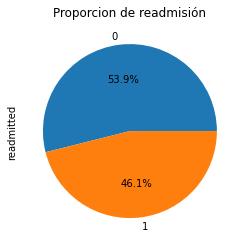

In [104]:
diabetes=diabetes.replace({"NO":0,"<30":1,">30":1})

# Hacer el conteo de las readmisiones y las NO readmisiones
print(diabetes.readmitted.value_counts())

# Ver graficamente esa distribución entre reamitidos y NO readmitidos
# Pie chart
diabetes.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proporcion de readmisión")
plt.show()

Esto es relevante ya que nos permite identificar que tan balanceada se encuentra la muestra con el fin de evitar sesgos a la hora del modelamiento. La raza es una variable categórica sobre la cual nos interesa ver cómo se encuentra distribuida.

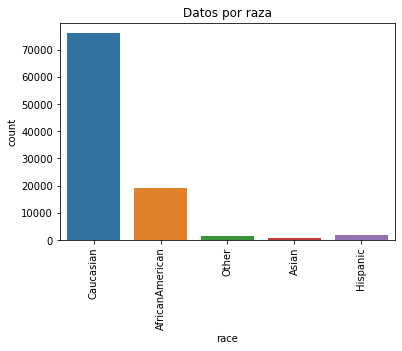

Proporción de cada raza
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


In [105]:
sns.countplot(x=diabetes.race, data = diabetes)
plt.xticks(rotation=90)
plt.title("Datos por raza")
plt.show()

print("Proporción de cada raza")
print(diabetes.race.value_counts(normalize = True)*100)

Como se observa, más del 95% de la muestra se concentra en las razas Caucasica y Afroamericana, con el fin de reducir el número de clases se agrupan las demás razas en la clase Other

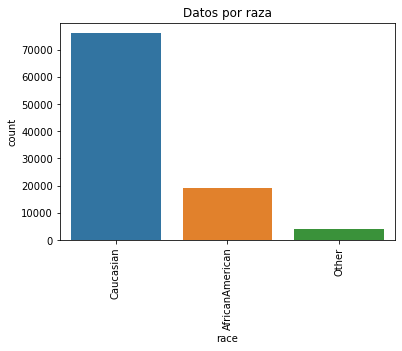

Proporción de cada raza
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: race, dtype: float64


In [106]:
cambiar_razas={"Hispanic":"Other","Asian":"Other"}
diabetes.race=diabetes.race.replace(cambiar_razas)

#Graficar nuevamente la distribución luego del cambio
sns.countplot(x=diabetes.race, data = diabetes)
plt.xticks(rotation=90)
plt.title("Datos por raza")
plt.show()

print("Proporción de cada raza")
print(diabetes.race.value_counts(normalize = True)*100)

Sabemos que la muestra se encuentra balanceada respecto a readmisión, sin embargo vale la pena validar si este balance se mantiene entre razas o si para una raza es mayor la readmisión que para otra.

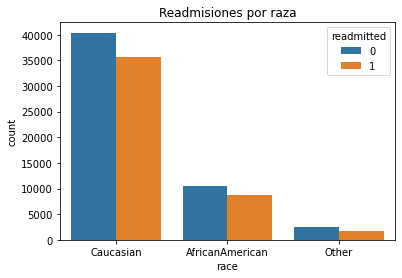

In [107]:
sns.countplot(x="race", hue= "readmitted", data = diabetes)
plt.title("Readmisiones por raza")
plt.show()

A raíz de esto podemos ver que la muestra está balanceada entre readmisiones y NO readmisiones tanto globalmente como agrupado por razas. Es importante ver cuál es la probabilidad de ser readmitido en función de la raza para ver si existe alguna diferencia entre ellas.

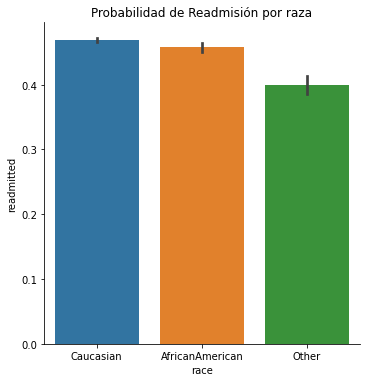

In [108]:
sns.catplot(x = "race", y = "readmitted",
            data = diabetes, kind = "bar", height= 5)
plt.title("Probabilidad de Readmisión por raza")
plt.show()

A partir de este gráfico se observa que la probabilidad de ser Readmitido no difiere mucho entre los Caucasicos y los Afroamericanos y que a pesar de que la categoria de Other representa solo el 4.2% de la muestra, su probabilidad de readmisión no se encuentra tan alejada de la de las demás razas.
Ahora haremos el mismo análisis para la variable de género, esto nos permitirá identificar primero la distribución de la muestra y hacer algunas inferencias respecto a la readmisión.

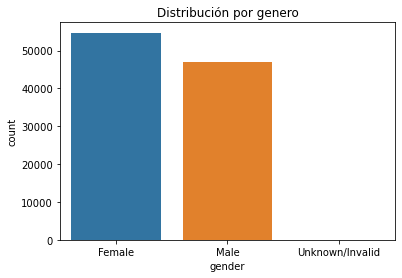

Proporción por genero
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


In [109]:
sns.countplot(x = "gender", data = diabetes)
plt.title("Distribución por genero")
plt.show()

print("Proporción por genero")
print(diabetes.gender.value_counts(normalize = True))

Aquí se observa que casi la totalidad de la muestra se encuentra distribuida entre Homvbres y Mujeres, sin embargo hay un porcentaje menor al 1% que corresponde a desconocido o inválido, lo cual no aporta al modelamiento por lo cual se puede eliminar. Posteriormente se graficara nuevamente y se evaluara la readmisión por genero y la probailidad de readmisión. 

Por otra parte aproximadamente el 54% de la muestra corresponde a mujeres y el 46% a hombres, la muestra se encuentra balanceada en la variable genero.

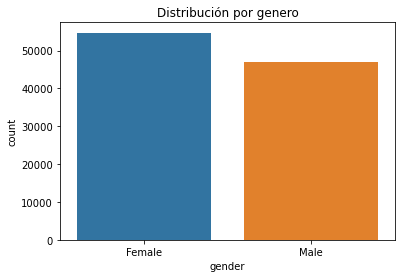

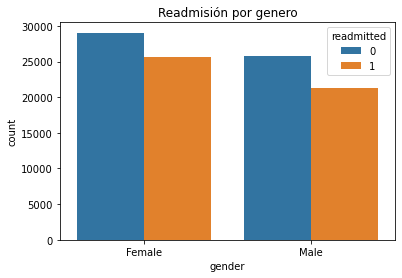

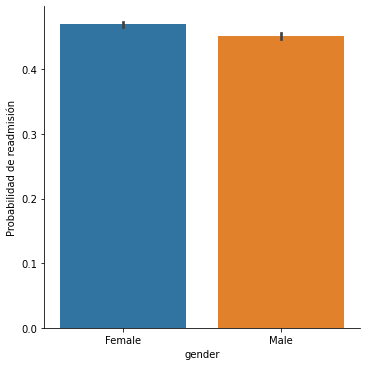

In [110]:
diabetes = diabetes.drop(diabetes.loc[diabetes["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabetes)
plt.title("Distribución por genero")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabetes)
plt.title("Readmisión por genero")
plt.show()

prob_gen = sns.catplot(x = "gender",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_gen.set_ylabels("Probabilidad de readmisión")
plt.show()

En términos generales, la muestra se encuentra balanceada por género así como también la distribución de la readmisión por género. La probabilidad de readmisión no difiere significativamente entre géneros.

Ahora observemos como se encuentra distribuida la muestra en edad, realizaremos un proceso similar al expuesto con las variables de raza y género.

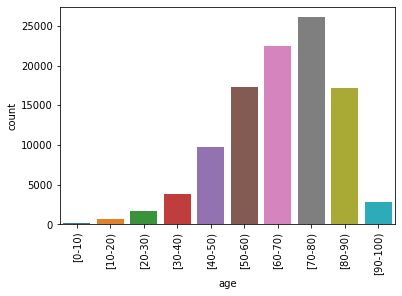

Proporción por rango de edad
[70-80)     0.256144
[60-70)     0.220925
[50-60)     0.169570
[80-90)     0.168991
[40-50)     0.095172
[30-40)     0.037096
[90-100)    0.027446
[20-30)     0.016283
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64


In [111]:
sns.countplot(x="age", data = diabetes)
plt.xticks(rotation = 90)
plt.show()

print("Proporción por rango de edad")
print(diabetes.age.value_counts(normalize = True))

A partir de esto se puede observar que aproximadamente el 90% de la muestra se encuentra entre 40 y 90 años. Está variable es de mucho interés ya que apriori puede afectar sigificativamente la readmisión por está razón se hace el cambio de estos intervalos por variables numéricas que faciliten el modelado. En particular se toma el punto medio de cada intervalo para sustituir la notación de paréntesis por un solo valor.

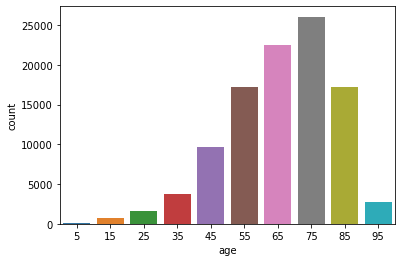

Proporción por rango de edad
75    0.256144
65    0.220925
55    0.169570
85    0.168991
45    0.095172
35    0.037096
95    0.027446
25    0.016283
15    0.006790
5     0.001582
Name: age, dtype: float64


In [112]:
diabetes.age = diabetes.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabetes)
plt.show()

print("Proporción por rango de edad")
print(diabetes.age.value_counts(normalize = True))

Veamos la distribución de la readmisión en rangos de edad, así como también la probabilidad de readmisión en función de la edad.

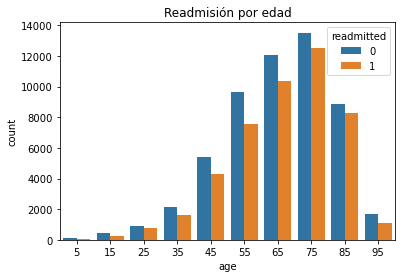

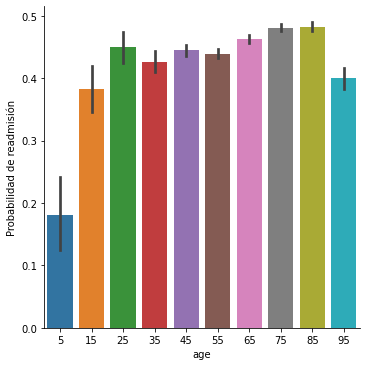

In [113]:
sns.countplot(x = "age", hue = "readmitted", data = diabetes)
plt.title("Readmisión por edad")
plt.show()

prob_age = sns.catplot(x = "age",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_age.set_ylabels("Probabilidad de readmisión")
plt.show()

A partir de estos gráficos se puede observar que entre los 70 y 90 años la probabilidad de readmisión es de casi 0.5. Sin embargo, en los demás rangos (a excepción de (0-10, 10-20,90-100)) la probabilidad de readmisión es superior a 0.4, nada despreciable. Es importante resaltar que aproximadamente el 65% de la muestra corresponde a la tercera edad, mayores de 60 años.

Continuamos el análisis exploratorio con la variable de peso utilizando el mismo razonamiento que hemos empleado a lo largo de esta exposición.

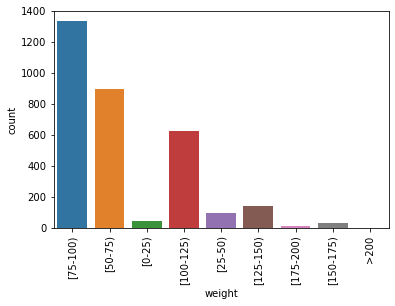

Proporción por rango de peso
[75-100)     0.417892
[50-75)      0.280576
[100-125)    0.195496
[125-150)    0.045355
[25-50)      0.030341
[0-25)       0.015014
[150-175)    0.010948
[175-200)    0.003441
>200         0.000938
Name: weight, dtype: float64


In [114]:
sns.countplot(x="weight", data = diabetes)
plt.xticks(rotation = 90)
plt.show()

print("Proporción por rango de peso")
print(diabetes.weight.value_counts(normalize = True))

Respecto a esta variable es importante destacar que tan solo poco más del 3% de los datos cuentan con esta información (3197). Al observar la distribución, 90% de los datos disponibles se encuentran entre las 50 libras y las 125 libras. Al igual que con la variable de edad es convenientes para efectos del modelamiento, cambiar los intervalos y notación de paréntesis por valores numéricos. Posterior a esto se graficara nuevamente la distribución.

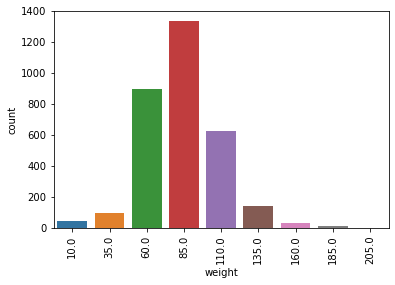

Proporción por peso
85.0     0.417892
60.0     0.280576
110.0    0.195496
135.0    0.045355
35.0     0.030341
10.0     0.015014
160.0    0.010948
185.0    0.003441
205.0    0.000938
Name: weight, dtype: float64


In [115]:
diabetes["weight"]=diabetes["weight"].replace({"[75-100)":85,
                             "[50-75)":60,
                             "[100-125)":110,
                             "[125-150)":135,
                             "[25-50)":35,
                             "[0-25)":10,
                             "[150-175)":160,
                             "[175-200)":185,
                             ">200":205})

sns.countplot(x="weight", data = diabetes)
plt.xticks(rotation = 90)
plt.show()

print("Proporción por peso")
print(diabetes.weight.value_counts(normalize = True))

Veamos la distribución de la readmisión por peso, así como también la probabilidad de readmisión en función del peso.

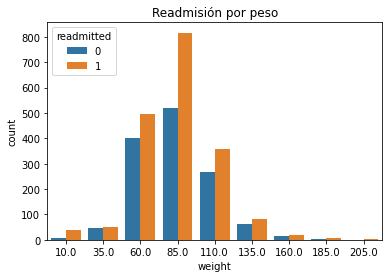

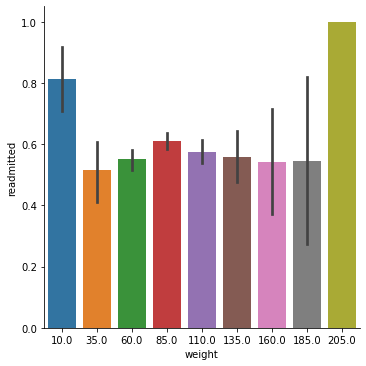

In [116]:
sns.countplot(x = "weight", hue = "readmitted", data = diabetes)
plt.title("Readmisión por peso")
plt.show()

prob_weight = sns.catplot(x = "weight",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_age.set_ylabels("Probabilidad de readmisión")
plt.show()

En este caso, hay que analizar con mayor detenimiento la probabilidad, considerando que para los pesos de 10, 35, 160, 185 y 205, se tienen menos de 100 datos. Considerando esto, los pesos con mayor probabilidad de readmisión son 85, 110 y 60.

Continuaremos el análisis con la variable de tipo de admisión.

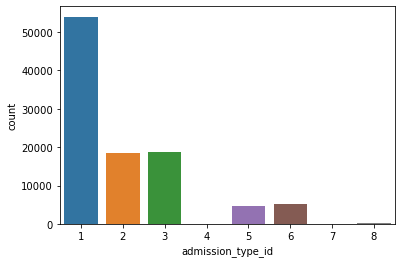

Proporción por tipo de admisión
1    0.530527
3    0.185411
2    0.181598
6    0.051993
5    0.047021
8    0.003145
7    0.000206
4    0.000098
Name: admission_type_id, dtype: float64


In [117]:
sns.countplot(x="admission_type_id", data = diabetes)
plt.show()

print("Proporción por tipo de admisión")
print(diabetes.admission_type_id.value_counts(normalize = True))

Más de la mitad de la muestra tiene el tipo de admisión 1, correspondiente a emergencias. El 36% de la muestra tiene el tipo de admisión 2 o 3, los cuales corresponden a Urgencias y Electivo. En terminos de modelamiento los ingresos de emergencias y urgencias corresponden a lo mismo. Mientras que la categoria 5, que corresponde a "Not Available", la 6 "NULL" y la 8 "Not Mapped" pueden ser recategorizadas como NaN.

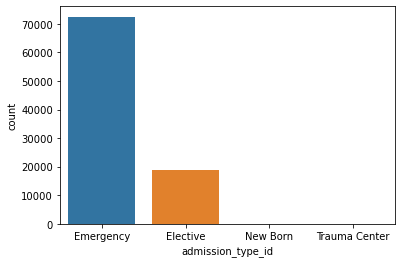

Proporción por tipo de admisión
Emergency        0.793153
Elective         0.206508
Trauma Center    0.000230
New Born         0.000109
Name: admission_type_id, dtype: float64


In [118]:
reemplazos = {1:"Emergency",
          2:"Emergency",
          3:"Elective",
          4:"New Born",
          5:np.nan,
          6:np.nan,
          7:"Trauma Center",
          8:np.nan}

diabetes.admission_type_id = diabetes.admission_type_id.replace(reemplazos)

sns.countplot(x="admission_type_id", data = diabetes)
plt.show()

print("Proporción por tipo de admisión")
print(diabetes.admission_type_id.value_counts(normalize = True))

Veamos la distribución de la readmisión por tipo de admisión, así como también la probabilidad de readmisión en función del tipo de admisión.

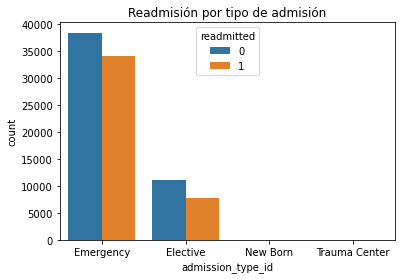

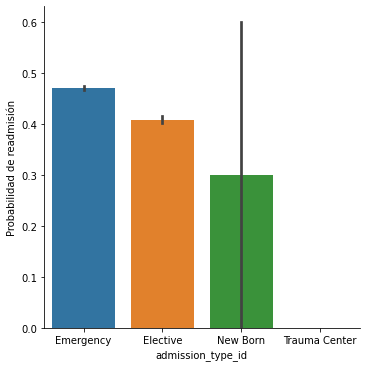

In [119]:
sns.countplot(x = "admission_type_id", hue = "readmitted", data = diabetes)
plt.title("Readmisión por tipo de admisión")
plt.show()

prob_adm_typ = sns.catplot(x = "admission_type_id",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_adm_typ.set_ylabels("Probabilidad de readmisión")
plt.show()

En cuanto a la distribución de readmitidos en función de los tipos de admisión la muestra se encuentra balanceada. Evidentemente un ingreso de emergencia parece presentar una mayor probabilidad de readmisión que la admisión de tipo New Born y en menor medida Elective.

Continuamos el análisis con la variable discharge_disposition_id

In [120]:
#En primer lugar veamos los posibles valores de la variable discharge_disposition_id
diabetes.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

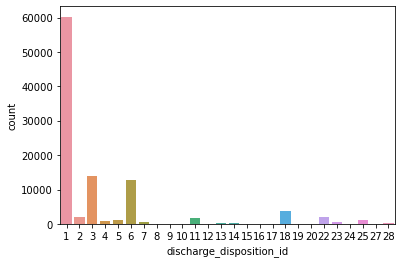

Proporción por disposición de descarga
1     0.591885
3     0.137123
6     0.126785
18    0.036271
2     0.020911
22    0.019575
11    0.016136
5     0.011635
25    0.009719
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003656
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    0.000138
16    0.000108
19    0.000079
10    0.000059
27    0.000049
12    0.000029
20    0.000020
Name: discharge_disposition_id, dtype: float64


In [121]:
#Ahora veamos la distribución de la variable
sns.countplot(x="discharge_disposition_id", data = diabetes)
plt.show()

print("Proporción por disposición de descarga")
print(diabetes.discharge_disposition_id.value_counts(normalize = True))

El 85% de la muestra se concentra en los id de disposición de descarga 1,3 y 6, todos relacionados con la casa (Home). Por otra parte, hay demasiadas clases cuya especificidad no nos interesa, por lo cual es necesario reducir el número de clases diferenciando en descargados en la casa (para todos los que tengan Home en la descripción), Otros para todos los demás que no sean Null, Not Mapped o Unknown/Invalid. De esta forma graficaremos nuevamente.

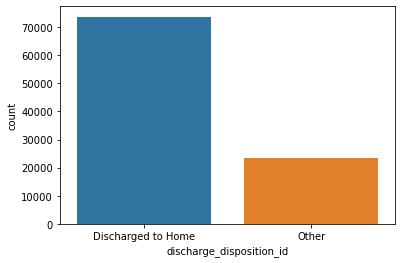

Proporción por disposición de descarga
Discharged to Home    0.758619
Other                 0.241381
Name: discharge_disposition_id, dtype: float64


In [122]:
reemplazos_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabetes["discharge_disposition_id"] = diabetes["discharge_disposition_id"].replace(reemplazos_discharge)

#Ahora veamos la distribución de la variable
sns.countplot(x="discharge_disposition_id", data = diabetes)
plt.show()

print("Proporción por disposición de descarga")
print(diabetes.discharge_disposition_id.value_counts(normalize = True))

Así podemos tener un panorama más claro de la distribución de la variable con un 76% dejado en casa y un 24% en otros. Veamos la distribución de la readmisión por disposición de descarga, así como también la probabilidad de readmisión en función de la disposición de descarga.

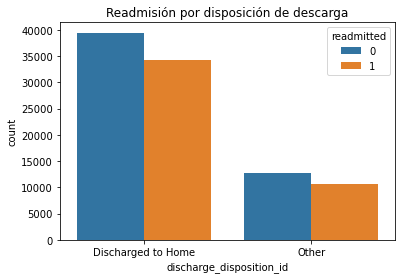

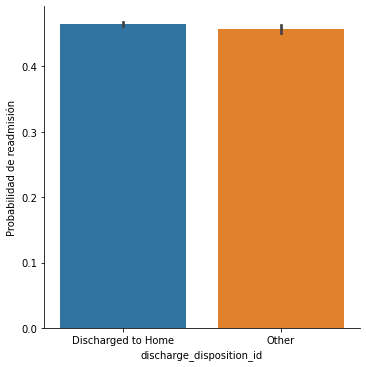

In [123]:
sns.countplot(x = "discharge_disposition_id", hue = "readmitted", data = diabetes)
plt.title("Readmisión por disposición de descarga")
plt.show()

prob_disch = sns.catplot(x = "discharge_disposition_id",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_disch.set_ylabels("Probabilidad de readmisión")
plt.show()

La distribución de readmisión es balanceada respecto a esta variable y la probabilidad de readmisión es muy similar para ambas categorias de la variable. Continuamos el análisis con la fuente de admisión. 

In [124]:
#Veamos los valores que puede tomar la variable de fuente de admisión
diabetes.admission_source_id.unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

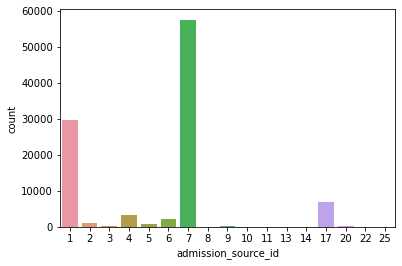

Proporción por fuente de admisión
7     0.564960
1     0.290518
17    0.066635
4     0.031318
6     0.022248
2     0.010849
5     0.008402
3     0.001838
20    0.001582
9     0.001228
8     0.000157
22    0.000118
10    0.000079
11    0.000020
14    0.000020
25    0.000020
13    0.000010
Name: admission_source_id, dtype: float64


In [125]:
#Ahora veamos la distribución de la variable
sns.countplot(x="admission_source_id", data = diabetes)
plt.show()

print("Proporción por fuente de admisión")
print(diabetes.admission_source_id.value_counts(normalize = True))

Nuevamente encontramos múltiples categorias, a pesar de que el 85% de la muestra corresponde a las fuentes de admisión 1 y 7 que corresponden a "Physician Referral" y "Emergency Room" respectivamente. Existen varias clases que pueden reducirse a referral (remisiones), otros para todo lo que no sea Null, Not Mapped o Unknown/Invalid. De esta forma reducimos las categorias que tenemos y tendremos un panorama más claro de la distribución de la variable. Graficaremos nuevamente.

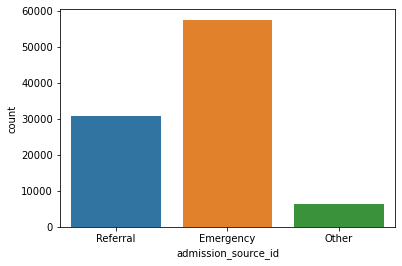

Proporción por fuente de admisión
Emergency    0.606321
Referral     0.325403
Other        0.068276
Name: admission_source_id, dtype: float64


In [126]:
reemplazos_adm_sou = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabetes.admission_source_id = diabetes.admission_source_id.replace(reemplazos_adm_sou)

#Ahora veamos la distribución de la variable
sns.countplot(x="admission_source_id", data = diabetes)
plt.show()

print("Proporción por fuente de admisión")
print(diabetes.admission_source_id.value_counts(normalize = True))

El 61% de la muestra coprresponde a la fuente de admisión de Emergencia y un 33% a remisiones. Veamos la distribución de la readmisión por fuente de admisión, así como también la probabilidad de readmisión en función de la fuente de admisión.

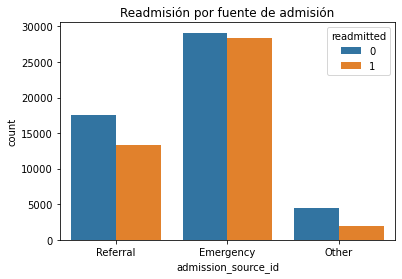

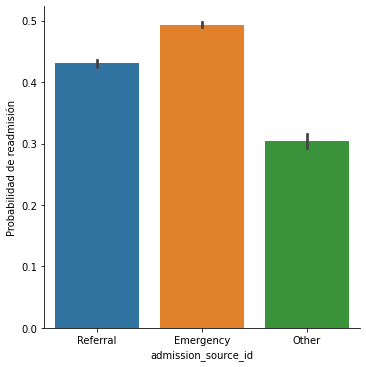

In [127]:
sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabetes)
plt.title("Readmisión por fuente de admisión")
plt.show()

prob_adm_sou = sns.catplot(x = "admission_source_id",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_adm_sou.set_ylabels("Probabilidad de readmisión")
plt.show()

Se observa un balance de la readmisión en cada categoria de la variable, similar al observado en las demás. Por otra parte, la fuente de admisión de emergencia tiene una probabilidad de readmisión mayor a las remisiones y en mayor medida a otros.

Ahora analizaremos la variable relacionada con el tiempo en el hospital siendo este el tiempo entre admisión y descarga.

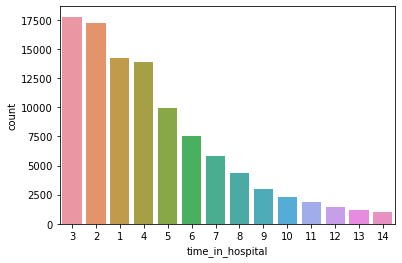

Proporción por tiempo en el hospital
3     0.174484
2     0.169256
1     0.139599
4     0.136828
5     0.097933
6     0.074084
7     0.057575
8     0.043139
9     0.029500
10    0.023014
11    0.018229
12    0.014229
13    0.011890
14    0.010239
Name: time_in_hospital, dtype: float64


In [128]:
#Ahora veamos la distribución de la variable
sns.countplot(x="time_in_hospital", data = diabetes, 
              order = diabetes.time_in_hospital.value_counts().index)
plt.show()

print("Proporción por tiempo en el hospital")
print(diabetes.time_in_hospital.value_counts(normalize = True))

Aproximadamente el 62% de la muestra pasa entre 1 y 4 días en el hospital. Veamos ahora como es la distribución del tiempo en el hospital para readmitidos y no readmitidos.

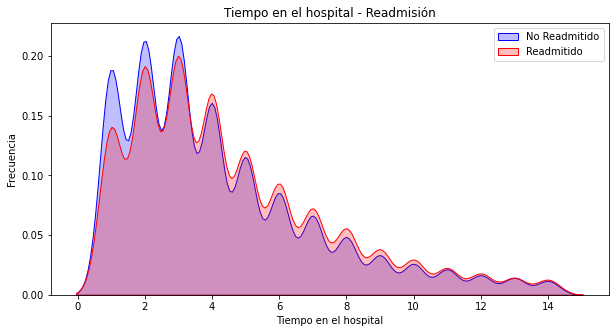

In [129]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "No Readmitido")

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitido")
ax.legend(loc="upper right")

ax.set_xlabel("Tiempo en el hospital")
ax.set_ylabel("Frecuencia")
ax.set_title("Tiempo en el hospital - Readmisión")
plt.show()

A partir de esta gráfica podemos ver que la distribución del tiempo en el hospital es muy similar tanto para readmitidos como NO readmitidos. En general, la mayoría de las personas psan entre 1 y 4 días en el hospital.

Nuestro análisis continuará con la variable de la entidad que paga (Payer Code)

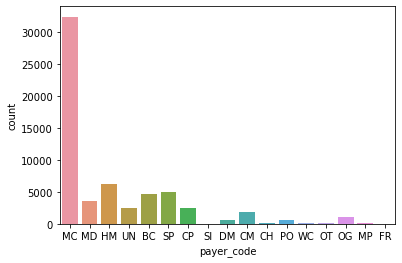

Proporción por código de la entidad que paga
MC    0.527395
HM    0.102003
SP    0.081404
BC    0.075681
MD    0.057423
CP    0.041149
UN    0.039800
CM    0.031492
OG    0.016795
PO    0.009625
DM    0.008926
CH    0.002374
WC    0.002195
OT    0.001545
MP    0.001284
SI    0.000894
FR    0.000016
Name: payer_code, dtype: float64


In [130]:
#Ahora veamos la distribución de la variable
sns.countplot(x="payer_code", data = diabetes)
plt.show()

print("Proporción por código de la entidad que paga")
print(diabetes.payer_code.value_counts(normalize = True))

A pesar de que son muchas categorias, en este caso no es posible agruparlas, ya que cada entidad difiere significativamente de la otra. Aproximadamente el 63% de las observaciones corresponden a los códigos MC y HM. Ahora se presenta la distribución de la readmisión por código de entidad que paga así como la probabilidad de readmisión.

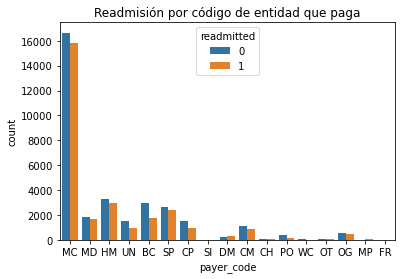

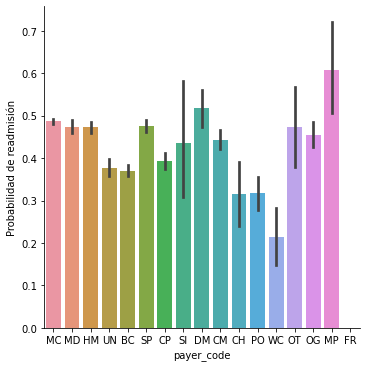

In [131]:
sns.countplot(x = "payer_code", hue = "readmitted", data = diabetes)
plt.title("Readmisión por código de entidad que paga")
plt.show()

prob_payer = sns.catplot(x = "payer_code",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_payer.set_ylabels("Probabilidad de readmisión")
plt.show()

El balance de readmisión evidenciado en las demás variables se mantiene para cada código, mientras que la probabilidad de readmisión de tres de las entidades con mayor información es de cerca de 0.5 (MC,MD,HM,SP). UN y BC a pesar de tener una cantidad de datos similar a las de MD, HM y SP tienen una probabilidad de readmisión menor con menos de 0.4.

Seguimos con la variable de especialidad médica

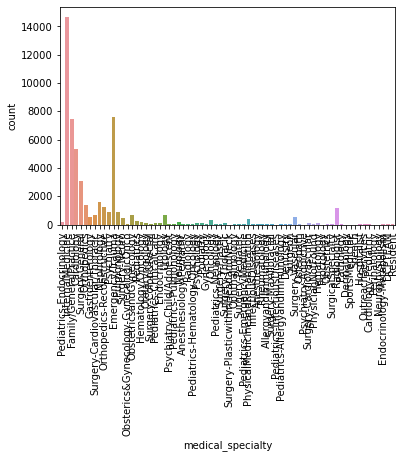

Proporción por especialidad medica
InternalMedicine          0.282442
Emergency/Trauma          0.145997
Family/GeneralPractice    0.143585
Cardiology                0.103269
Surgery-General           0.059808
                            ...   
SportsMedicine            0.000019
Dermatology               0.000019
Psychiatry-Addictive      0.000019
Speech                    0.000019
Proctology                0.000019
Name: medical_specialty, Length: 72, dtype: float64


In [132]:
sns.countplot(x="medical_specialty", data = diabetes)
plt.xticks(rotation = 90)
plt.show()

print("Proporción por especialidad medica")
print(diabetes.medical_specialty.value_counts(normalize = True))

Como se observa, existen 72 especialidades médicas. Sin embargo, más del 70% de la muestra corresponde a Medicina Interna, Energencia/Trauma, Familia/Practica General, Cardiologia, Cirugia-General. Como existen tantas categorias, podemos dejar aquellas que concentran la mayor cantidad de datos de forma individual y agrupar el resto en una categoria Otros. Luego, graficaremos nuevamente para tener un mejor entendimiento de la variable.

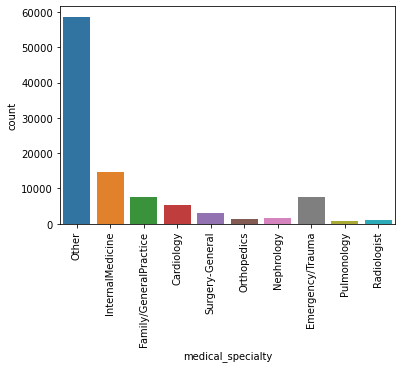

Proporción por especialidad medica
Other                     0.576329
InternalMedicine          0.143815
Emergency/Trauma          0.074339
Family/GeneralPractice    0.073111
Cardiology                0.052583
Surgery-General           0.030453
Nephrology                0.015851
Orthopedics               0.013757
Radiologist               0.011202
Pulmonology               0.008559
Name: medical_specialty, dtype: float64


In [133]:
main_spec=['InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        "Nephrology","Orthopedics","Radiologist","Pulmonology"]

diabetes.loc[~diabetes['medical_specialty'].isin(main_spec),'medical_specialty']='Other'

sns.countplot(x="medical_specialty", data = diabetes)
plt.xticks(rotation = 90)
plt.show()

print("Proporción por especialidad medica")
print(diabetes.medical_specialty.value_counts(normalize = True))

Otras especialidades médicas concentra casi el 58% de la muestra. Ahora se presenta la distribución de la readmisión por especialidad médica así como la probabilidad de readmisión.

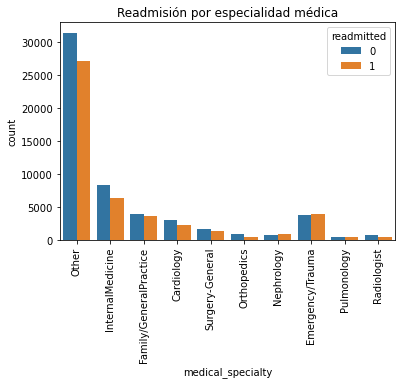

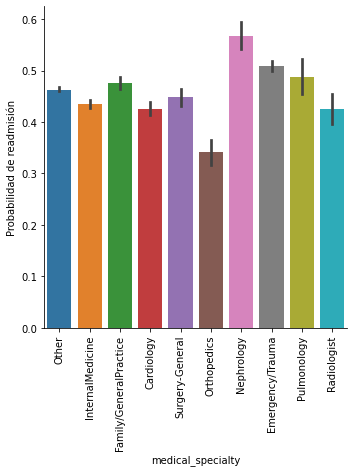

In [134]:
sns.countplot(x = "medical_specialty", hue = "readmitted", data = diabetes)
plt.title("Readmisión por especialidad médica")
plt.xticks(rotation = 90)
plt.show()

prob_spe = sns.catplot(x = "medical_specialty",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_spe.set_ylabels("Probabilidad de readmisión")
plt.xticks(rotation = 90)
plt.show()

Para aquellas categorias en las que contamos con más información la probabilida de readmisión es de 0.45 aproximadamente. Mientras que Emergency/Trauma y Nefrología tienen la mayor probabilidad de readmisión.

Procederemos a analizar la variable de número de procedimientos de laboratorio.

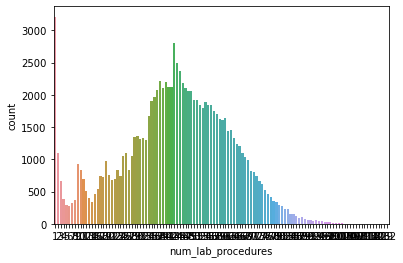

Proporción por número de procedimientos de laboratorio
1      0.031524
43     0.027554
44     0.024528
45     0.023348
38     0.021737
         ...   
107    0.000010
118    0.000010
129    0.000010
120    0.000010
121    0.000010
Name: num_lab_procedures, Length: 118, dtype: float64


In [135]:
sns.countplot(x="num_lab_procedures", data = diabetes)
plt.show()

print("Proporción por número de procedimientos de laboratorio")
print(diabetes.num_lab_procedures.value_counts(normalize = True))

Existen 118 valores diferentes del número de procedimientos de laboratorio realizados, razón por la cual este histograma no es suficiente para entender con claridad la distribución de la variable. Emplearemos un gráfico de densidad que facilite la tarea.

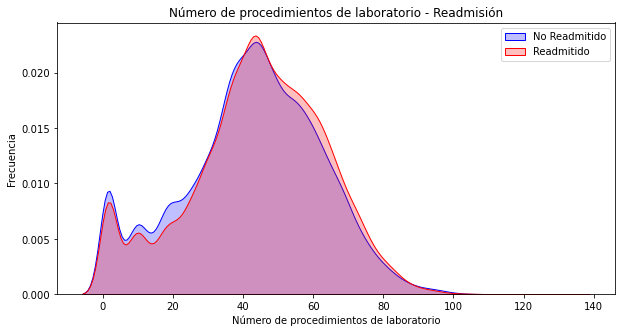

In [136]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "No Readmitido")

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitido")

ax.legend(loc="upper right")

ax.set_xlabel("Número de procedimientos de laboratorio")
ax.set_ylabel("Frecuencia")
ax.set_title("Número de procedimientos de laboratorio - Readmisión")

plt.show()

A partir de esta gráfica podemos ver que el número de procedimientos de laboratorio se distribuye de forma muy similar tanto para readmitidos como no readmitidos, entre 30 y 70 se concentra la mayoría de las observaciones.

Ahora consideraremos la variable de número de procedimientos.

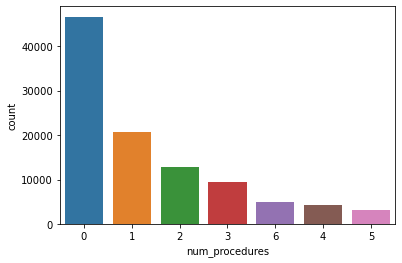

Proporción por número de procedimientos
0    0.458438
1    0.203817
2    0.124957
3    0.092794
6    0.048682
4    0.041076
5    0.030237
Name: num_procedures, dtype: float64


In [137]:
#Ahora veamos la distribución de la variable
sns.countplot(x="num_procedures", data = diabetes, 
              order = diabetes.num_procedures.value_counts().index)
plt.show()

print("Proporción por número de procedimientos")
print(diabetes.num_procedures.value_counts(normalize = True))

Poco menos de la mitad de la muestra no se ha realizado ningún procedimiento. Veamos la distribución de la readmisión por el número de procedimientos así como la probabilidad de readmisión.

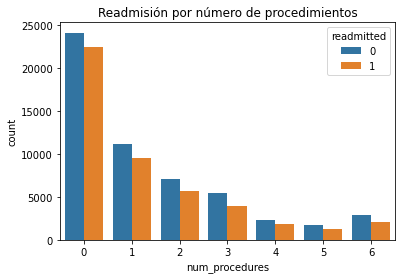

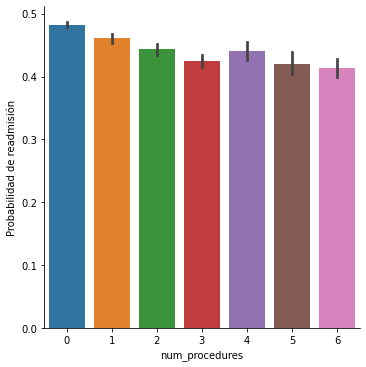

In [138]:
sns.countplot(x = "num_procedures", hue = "readmitted", data = diabetes)
plt.title("Readmisión por número de procedimientos")
plt.show()

prob_proced = sns.catplot(x = "num_procedures",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5)
prob_proced.set_ylabels("Probabilidad de readmisión")
plt.show()

El balance de la readmisión por cada categoria se mantiene para esta variable. Por otro lado, la probabilidad de readmisión parece ser mayor para quienes tienen menos procedimientos, en la medida en la que se tienen más procedimientos parece reducirse ligeramente la probabilidad de readmisión.

Continuamos el análisis con la variable de número de medicamentos.

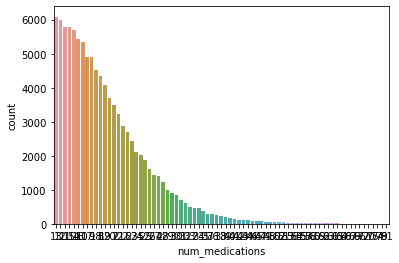

Proporción por número de medicamentos
13    0.059806
12    0.059000
11    0.056946
15    0.056917
14    0.056081
        ...   
70    0.000020
75    0.000020
74    0.000010
79    0.000010
81    0.000010
Name: num_medications, Length: 75, dtype: float64


In [139]:
#Ahora veamos la distribución de la variable
sns.countplot(x="num_medications", data = diabetes, 
              order = diabetes.num_medications.value_counts().index)
plt.show()

print("Proporción por número de medicamentos")
print(diabetes.num_medications.value_counts(normalize = True))

Dado que tenemos una situación similar a la de número de procedimientos de laboratorio, utilizaremos nuevamente un gráfico de densidad que nos proporcione información más clara sobre la variable.

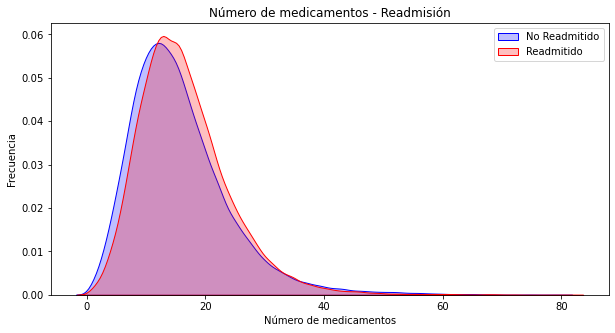

In [140]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 0), "num_medications"],
                 color = "b", shade = True,label = "No Readmitido")

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 1), "num_medications"],
                 color = "r", shade = True, label = "Readmitido")

ax.legend(loc="upper right")

ax.set_xlabel("Número de medicamentos")
ax.set_ylabel("Frecuencia")
ax.set_title("Número de medicamentos - Readmisión")

plt.show()

A través de esta gráfica se observa que la distribución de readmisión y no readmisión es similar entre si para la variable del número de medicamentos. Concentrando la mayoría de las observaciones entre 5 y 40 medicamentos.

Continuamos con la variable number_outpatient, la cual es el número de visitas ambulatorias del paciente en el año precedente al encuentro.

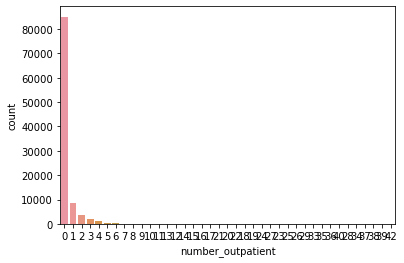

Proporción por número de visitas ambulatorias
0     0.835510
1     0.083989
2     0.035317
3     0.020066
4     0.010800
5     0.005238
6     0.002978
7     0.001523
8     0.000963
9     0.000816
10    0.000560
11    0.000413
13    0.000305
12    0.000295
14    0.000275
15    0.000197
16    0.000147
17    0.000079
21    0.000069
20    0.000069
22    0.000049
18    0.000049
19    0.000029
24    0.000029
27    0.000029
23    0.000020
25    0.000020
26    0.000020
29    0.000020
33    0.000020
35    0.000020
36    0.000020
40    0.000010
28    0.000010
34    0.000010
37    0.000010
38    0.000010
39    0.000010
42    0.000010
Name: number_outpatient, dtype: float64


In [141]:
#Ahora veamos la distribución de la variable
sns.countplot(x="number_outpatient", data = diabetes, 
              order = diabetes.number_outpatient.value_counts().index)
plt.show()

print("Proporción por número de visitas ambulatorias")
print(diabetes.number_outpatient.value_counts(normalize = True))

El 83% de la muestra no registra ninguna visista ambulatoria al hospital en el año precedente al encuentro. Veamos la distribución de la readmisión de acuerdo con esta variable.

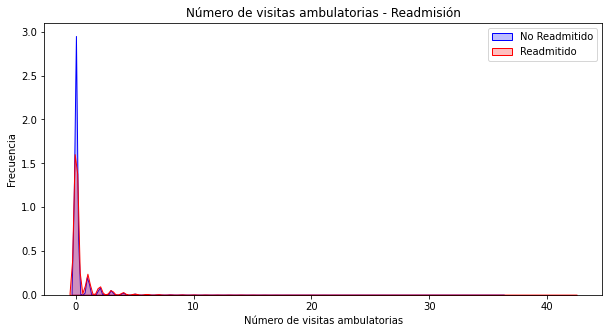

In [142]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 0), "number_outpatient"],
                 color = "b", shade = True,label = "No Readmitido")

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 1), "number_outpatient"],
                 color = "r", shade = True, label = "Readmitido")

ax.legend(loc="upper right")

ax.set_xlabel("Número de visitas ambulatorias")
ax.set_ylabel("Frecuencia")
ax.set_title("Número de visitas ambulatorias - Readmisión")

plt.show()

Continuamos el análisis con la variable number_emergency, la cual es el número de visitas de emergencia del paciente en el año precedente al encuentro.

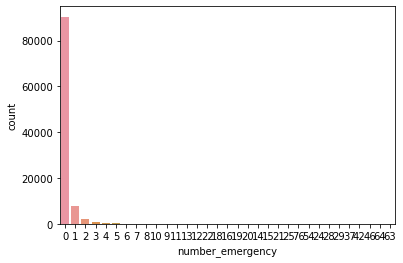

Proporción por número de visitas de emergencia
0     0.888142
1     0.075440
2     0.020066
3     0.007124
4     0.003675
5     0.001887
6     0.000924
7     0.000717
8     0.000491
10    0.000334
9     0.000324
11    0.000226
13    0.000118
12    0.000098
22    0.000059
18    0.000049
16    0.000049
19    0.000039
20    0.000039
14    0.000029
15    0.000029
21    0.000020
25    0.000020
76    0.000010
54    0.000010
24    0.000010
28    0.000010
29    0.000010
37    0.000010
42    0.000010
46    0.000010
64    0.000010
63    0.000010
Name: number_emergency, dtype: float64


In [143]:
#Ahora veamos la distribución de la variable
sns.countplot(x="number_emergency", data = diabetes, 
              order = diabetes.number_emergency.value_counts().index)
plt.show()

print("Proporción por número de visitas de emergencia")
print(diabetes.number_emergency.value_counts(normalize = True))

Al parecer la distribución es muy similar a la anterior variable, ya que cerca del 88% de la muestra no tuvo visitas de emergencia en el año precedente al encuentro. Observemos ahora la distribución de la readmisión en función de esta variable.

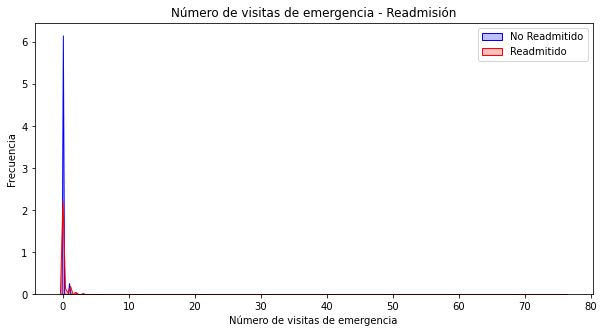

In [144]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 0), "number_emergency"],
                 color = "b", shade = True,label = "No Readmitido")

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 1), "number_emergency"],
                 color = "r", shade = True, label = "Readmitido")

ax.legend(loc="upper right")

ax.set_xlabel("Número de visitas de emergencia")
ax.set_ylabel("Frecuencia")
ax.set_title("Número de visitas de emergencia - Readmisión")

plt.show()

Se observa el mismo comportamiento. Continuamos el análisis con la variable number_inpatient, la cual es el número de visistas de hospitalización en el año precedente al encuentro.

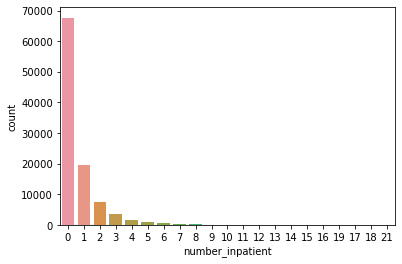

Proporción por número de visitas de hospitalización
0     0.664554
1     0.191828
2     0.074349
3     0.033519
4     0.015939
5     0.007979
6     0.004717
7     0.002634
8     0.001484
9     0.001091
10    0.000599
11    0.000482
12    0.000334
13    0.000197
14    0.000098
15    0.000088
16    0.000059
19    0.000020
17    0.000010
18    0.000010
21    0.000010
Name: number_inpatient, dtype: float64


In [145]:
#Ahora veamos la distribución de la variable
sns.countplot(x="number_inpatient", data = diabetes, 
              order = diabetes.number_inpatient.value_counts().index)
plt.show()

print("Proporción por número de visitas de hospitalización")
print(diabetes.number_inpatient.value_counts(normalize = True))

Aquí se observa que el 85% de la muestra tuvo 1 o ninguna hospitalización en el año previo al encuentro. Veamos la distribución de la readmisión en función de esta variable para tener mayor entendimiento.

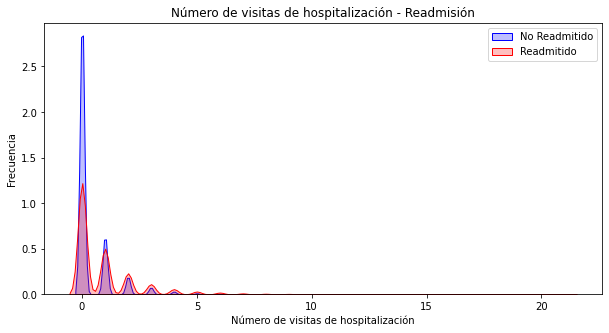

In [146]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 0), "number_inpatient"],
                 color = "b", shade = True,label = "No Readmitido")

ax = sns.kdeplot(diabetes.loc[(diabetes.readmitted == 1), "number_inpatient"],
                 color = "r", shade = True, label = "Readmitido")

ax.legend(loc="upper right")

ax.set_xlabel("Número de visitas de hospitalización")
ax.set_ylabel("Frecuencia")
ax.set_title("Número de visitas de hospitalización - Readmisión")

plt.show()

Desde que haya una hospitalización, la distribución de readmisión y no readmisión no difiere significativamente. 

Continuamos el análisis con las variables diag_1, diag_2, diag_3, las cuales corresponden a diagnósticos primarios y secundarios. Estos diagnósticos están codificados según los primeros tres dígitos de un sistema específico. Cada variable tiene más de 600 diferentes valores por lo cual es necesario realizar un tratamiento sobre los datos que nos permita realizar un análisis más interesante sobre la información que contienen.

In [147]:
def cambio_diagnostico(df, columnas):
    for col in columnas:
        df.loc[(df[col].str.contains("V")) | (df[col].str.contains("E")), col] = -1
        df[col] = df[col].astype(np.float16)

    for col in columnas:
        df["diag_temporal"] = np.nan
        df.loc[(df[col]>=390) & (df[col]<=459) | (df[col]==785), "diag_temporal"] = "Circulatory"
        df.loc[(df[col]>=460) & (df[col]<=519) | (df[col]==786), "diag_temporal"] = "Respiratory"
        df.loc[(df[col]>=520) & (df[col]<=579) | (df[col]==787), "diag_temporal"] = "Digestive"
        df.loc[(df[col]>=250) & (df[col]<251), "diag_temporal"] = "Diabetes"
        df.loc[(df[col]>=800) & (df[col]<=999), "diag_temporal"] = "Injury"
        df.loc[(df[col]>=710) & (df[col]<=739), "diag_temporal"] = "Muscoloskeletal"
        df.loc[(df[col]>=580) & (df[col]<=629) | (df[col] == 788), "diag_temporal"] = "Genitourinary"
        df.loc[(df[col]>=140) & (df[col]<=239), "diag_temporal"] = "Neoplasms"

        df["diag_temporal"] = df["diag_temporal"].fillna("Other")
        df[col] = df["diag_temporal"]
        df = df.drop("diag_temporal", axis=1)

    return df

Con ayuda de esta función es posible cambiar los códigos de los diagnósticos, de forma tal que podamos entender con claridad las variables que consideramos en el análisis y de esta manera obtener las estadísticas descriptivas que nos den un panorama claro de ellas.

In [148]:
diabetes = cambio_diagnostico(diabetes,["diag_1","diag_2","diag_3"])

In [149]:
diabetes.diag_1.unique()

array(['Diabetes', 'Other', 'Neoplasms', 'Circulatory', 'Respiratory',
       'Injury', 'Muscoloskeletal', 'Digestive', 'Genitourinary'],
      dtype=object)

In [150]:
diabetes.diag_2.unique()

array(['Other', 'Diabetes', 'Neoplasms', 'Circulatory', 'Respiratory',
       'Injury', 'Muscoloskeletal', 'Genitourinary', 'Digestive'],
      dtype=object)

In [151]:
diabetes.diag_3.unique()

array(['Other', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury',
       'Neoplasms', 'Genitourinary', 'Muscoloskeletal', 'Digestive'],
      dtype=object)

Como se puede observar ahora los valores de las variables de diagnóstico son más entendibles que los más de 600 códigos que teníamos antes. De esta forma, procederemos a realizar el análisis descriptivo que hemos empleado a lo largo de la exposición. Pero como el análisis es muy similar para cada columna de diagnóstico, utilizaremos una función que simplifique la tarea.

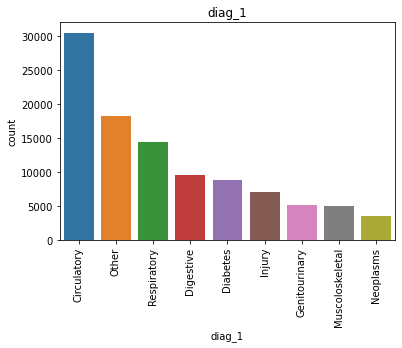

Proporción por diag_1
Circulatory        0.299087
Other              0.178778
Respiratory        0.141731
Digestive          0.093108
Diabetes           0.086053
Injury             0.068512
Genitourinary      0.050284
Muscoloskeletal    0.048711
Neoplasms          0.033735
Name: diag_1, dtype: float64


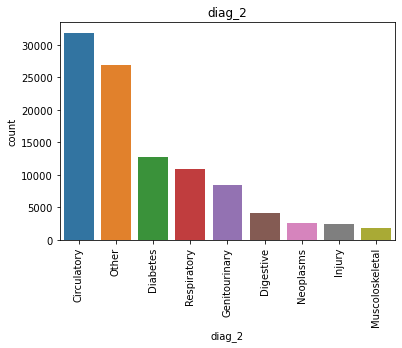

Proporción por diag_2
Circulatory        0.313277
Other              0.264448
Diabetes           0.125723
Respiratory        0.107062
Genitourinary      0.082309
Digestive          0.040978
Neoplasms          0.025029
Injury             0.023840
Muscoloskeletal    0.017334
Name: diag_2, dtype: float64


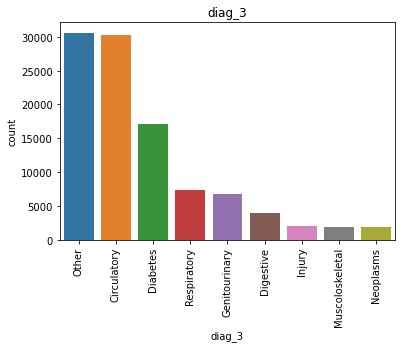

Proporción por diag_3
Other              0.300866
Circulatory        0.297800
Diabetes           0.168598
Respiratory        0.072305
Genitourinary      0.065643
Digestive          0.038619
Injury             0.019113
Muscoloskeletal    0.018818
Neoplasms          0.018238
Name: diag_3, dtype: float64


In [152]:
def graficar_diag(columna,df):
    sns.countplot(x = columna, data = df,
            order = df[f"{columna}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(columna)
    plt.show()
    
def propor_diag(columna,df):
    print("Proporción por "+columna)
    print(df[f"{columna}"].value_counts(normalize = True))

columnas_diagnostico = ["diag_1","diag_2","diag_3"]

for diagnostico in columnas_diagnostico:
    graficar_diag(diagnostico,diabetes)
    propor_diag(diagnostico,diabetes)

Como se observa para las variables diag_1 y diag_2 el diagnóstico que prevalece en la muestra con 30% en promedio es el circulario. En la variable diag_3 prevalece el que denominamos "Other" seguido de cerca por el circulatorio, tambioén con una participación cercana al 30%. Observemos cómo es la distribución de la readmisión en función de estas variables así como la probabilidad de readmisión.

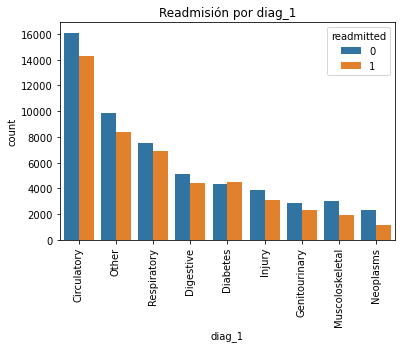

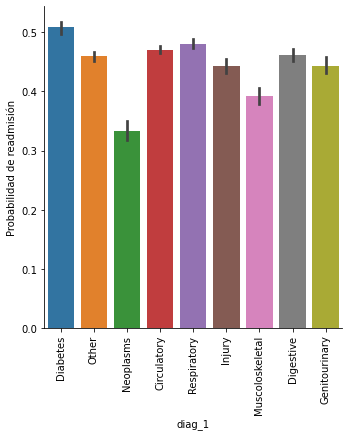

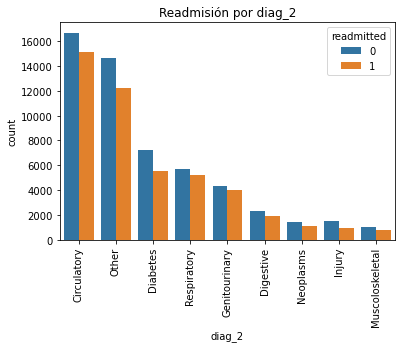

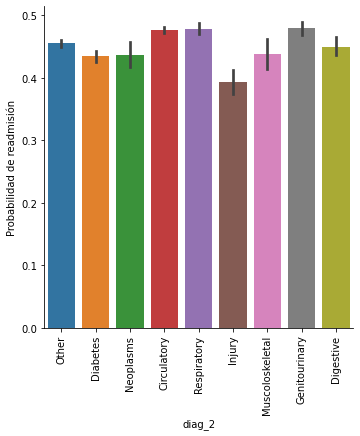

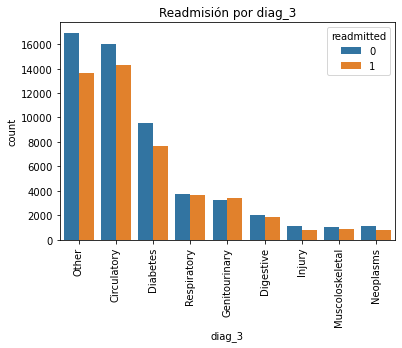

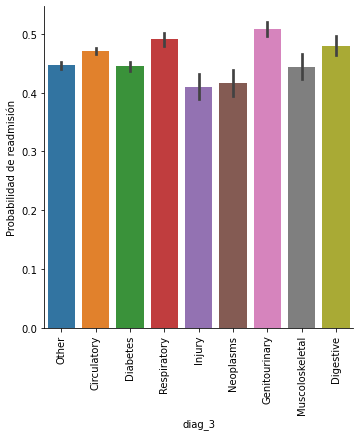

In [153]:
def graficar_diag_2(columna,df):
    sns.countplot(x = columna, hue = "readmitted",data = df,
            order = df[f"{columna}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title("Readmisión por "+columna)
    plt.show()
    
def prob_diag(columna,df):
    proba_diag=sns.catplot(x = columna,y = "readmitted",data = df, kind = "bar",height = 5)
    plt.xticks(rotation = 90)
    proba_diag.set_ylabels("Probabilidad de readmisión")
    plt.show()

columnas_diagnostico = ["diag_1","diag_2","diag_3"]

for diagnostico in columnas_diagnostico:
    graficar_diag_2(diagnostico,diabetes)
    prob_diag(diagnostico,diabetes)

Respecto a la readmisión las variables parecen mantener el balance en cada uno de los diagnósticos. Sin embargo, se observa que la probabilidad de readmisión mayor en la variable diag_1 corresponde a la diabetes seguida de las enfermedades respiratorias y circulatorias. En la variable diag_2 la probabilidad de readmisión más alta corresponde a las enfermedades respiratorias, circulatorias y genitourinarias. Finalmente en la variable diag_3 las enfermedades genitourinarias y respiratorias tienen la mayor probabilidad de readmisión. Las probabilidades de readmisión para las enfermedades descritas son cercanas a 0.5.

Continuaremos el análisis con la variable de número de diagnósticos.

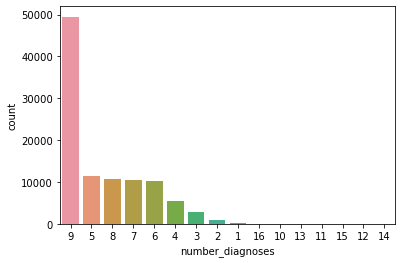

Proporción por número de diagnósticos
9     0.486159
5     0.111946
8     0.104321
7     0.102129
6     0.099850
4     0.054401
3     0.027859
2     0.010053
1     0.002152
16    0.000442
10    0.000167
13    0.000157
11    0.000108
15    0.000098
12    0.000088
14    0.000069
Name: number_diagnoses, dtype: float64


In [154]:
#Ahora veamos la distribución de la variable
sns.countplot(x="number_diagnoses", data = diabetes, 
              order = diabetes.number_diagnoses.value_counts().index)
plt.show()

print("Proporción por número de diagnósticos")
print(diabetes.number_diagnoses.value_counts(normalize = True))

Casi el 50% de la muestra cuenta con 9 diagnósticos y aproximadamente 89% de la muestra tiene más de 5 diagnósticos. Veamos ahora la distribución de la readmisión en función de esta variable así como la probabilidad de readmisión.

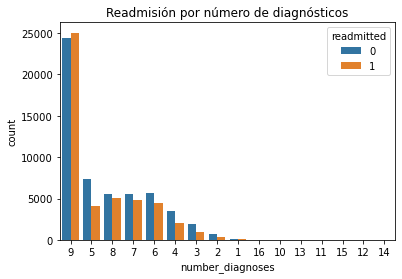

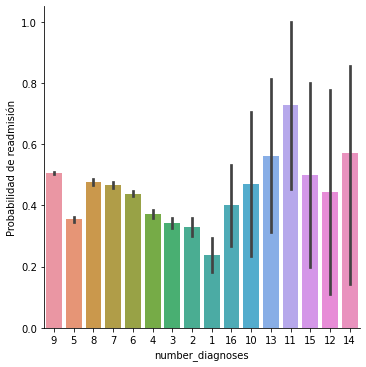

In [155]:
sns.countplot(x = "number_diagnoses", hue = "readmitted", data = diabetes,
             order = diabetes.number_diagnoses.value_counts().index)
plt.title("Readmisión por número de diagnósticos")
plt.show()

prob_numdiag = sns.catplot(x = "number_diagnoses",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5,order = diabetes.number_diagnoses.value_counts().index)
prob_numdiag.set_ylabels("Probabilidad de readmisión")
plt.show()

A pesar de que hay números de diagnósticos con mayor probabilidad de readmisión, es necesario considerar la medida de error sugerida por las líneas negras dentro de cada barra, la cual obedece a que para esas categorias se tiene muy poca información. Considerando esto, podemos decir que las personas con entre 6 y 9 diagnósticos parecen tener mayor probabilidad de readmisión.

La variable a considerar ahora es max_glu_serum, la cual contiene el resultado de la prueba o si está no ha sido aplicada.

In [156]:
diabetes.max_glu_serum.unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

Estos son los posibles valores de la columna, para efectos del modelamiento reemplazaremos la notación actual por valores numéricos. Luego se mostraran las gráficas con las que hemos venido describiendo el dataset.

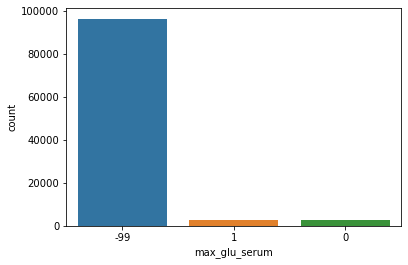

Proporción por resultado de prueba
-99    0.947466
 1     0.027014
 0     0.025520
Name: max_glu_serum, dtype: float64


In [157]:
diabetes["max_glu_serum"] = diabetes["max_glu_serum"].replace({">200":1,
                                                        ">300":1,
                                                        "Norm":0,
                                                        "None":-99}) 

#Ahora veamos la distribución de la variable
sns.countplot(x="max_glu_serum", data = diabetes, 
              order = diabetes.max_glu_serum.value_counts().index)
plt.show()

print("Proporción por resultado de prueba")
print(diabetes.max_glu_serum.value_counts(normalize = True))

Esto nos muestra que aproximadamente el 95% de la muestra no cuenta con información sobre resultado de prueba porque no se la han tomado. Lo que apriori sugiere que está variable no es relevante para el análisis.

Observemos ahora la variable A1Cresult, en la cual se consigna el resultado de la prueba o si esta no fue tomada aún en el paciente.

In [158]:
diabetes.A1Cresult.unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

Estos son los posibles valores de la columna, para efectos del modelamiento reemplazaremos la notación actual por valores numéricos. Luego se mostraran las gráficas con las que hemos venido describiendo el dataset.

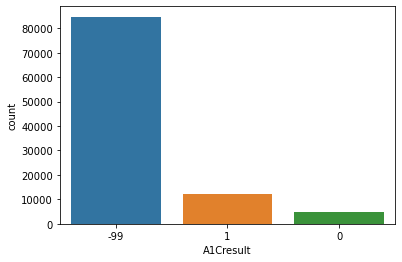

Proporción por resultado de prueba A1C
-99    0.832768
 1     0.118196
 0     0.049036
Name: A1Cresult, dtype: float64


In [159]:
diabetes["A1Cresult"] = diabetes["A1Cresult"].replace({">7":1,
                                           ">8":1,
                                           "Norm":0,
                                           "None":-99})

#Ahora veamos la distribución de la variable
sns.countplot(x="A1Cresult", data = diabetes, 
              order = diabetes.A1Cresult.value_counts().index)
plt.show()

print("Proporción por resultado de prueba A1C")
print(diabetes.A1Cresult.value_counts(normalize = True))

El 83% de la muestra no cuenta con información sobre la prueba, ya que no ha sido tomada, mientras que cerca del 12% tienen resultados >7 o >8. Veamos ahora la distribución de la readmisión y la probabilidad asociada en función de esta variable.

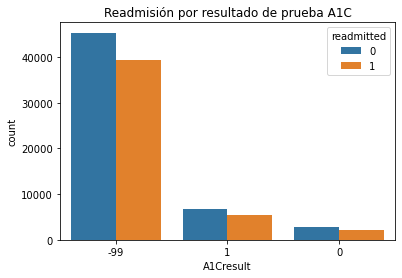

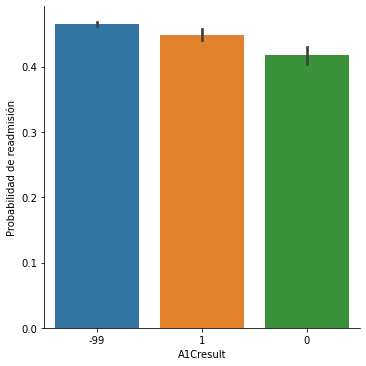

In [160]:
sns.countplot(x = "A1Cresult", hue = "readmitted", data = diabetes,
             order = diabetes.A1Cresult.value_counts().index)
plt.title("Readmisión por resultado de prueba A1C")
plt.show()

prob_a1c = sns.catplot(x = "A1Cresult",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5,order = diabetes.A1Cresult.value_counts().index)
prob_a1c.set_ylabels("Probabilidad de readmisión")
plt.show()

Al parecer los resultados de prueba normales tienen menor probabilidad de readmisión que los de otros resultados o de quienes no se han tomado la prueba, sin embargo, para todas las categorias la probabilidad de readmisión está por encima de 0.4.

Las variables que siguen a continuación están relacionados con la administración de medicamentos. Todas tienen un contenido similar y veremos si son o no relevantes para el modelo en función de su comntenido. Estamos hablando de las columnas de la 24 a la 46.

In [161]:
columnas_medic = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
                    'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
                    'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
                    'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

for columna in columnas_medic:
    print(columna)
    print(diabetes[f"{columna}"].unique())


metformin
['No' 'Steady' 'Up' 'Down']
repaglinide
['No' 'Up' 'Steady' 'Down']
nateglinide
['No' 'Steady' 'Down' 'Up']
chlorpropamide
['No' 'Steady' 'Down' 'Up']
glimepiride
['No' 'Steady' 'Down' 'Up']
acetohexamide
['No' 'Steady']
glipizide
['No' 'Steady' 'Up' 'Down']
glyburide
['No' 'Steady' 'Up' 'Down']
tolbutamide
['No' 'Steady']
pioglitazone
['No' 'Steady' 'Up' 'Down']
rosiglitazone
['No' 'Steady' 'Up' 'Down']
acarbose
['No' 'Steady' 'Up' 'Down']
miglitol
['No' 'Steady' 'Down' 'Up']
troglitazone
['No' 'Steady']
tolazamide
['No' 'Steady' 'Up']
examide
['No']
citoglipton
['No']
insulin
['No' 'Up' 'Steady' 'Down']
glyburide-metformin
['No' 'Steady' 'Down' 'Up']
glipizide-metformin
['No' 'Steady']
glimepiride-pioglitazone
['No' 'Steady']
metformin-rosiglitazone
['No' 'Steady']
metformin-pioglitazone
['No' 'Steady']


Exploremos las variables para comprender mejor como se distribuyen en los posibles valores.

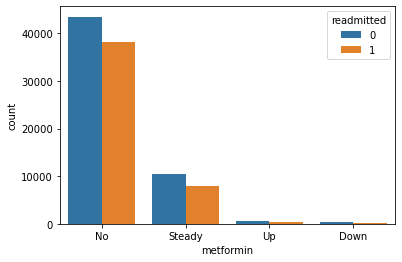

METFORMIN
No        0.803593
Steady    0.180272
Up        0.010485
Down      0.005650
Name: metformin, dtype: float64


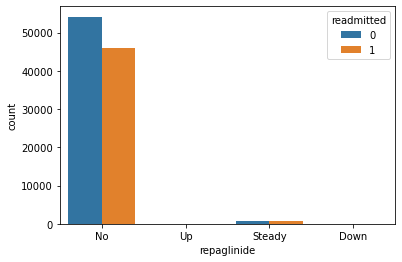

REPAGLINIDE
No        0.984877
Steady    0.013600
Up        0.001081
Down      0.000442
Name: repaglinide, dtype: float64


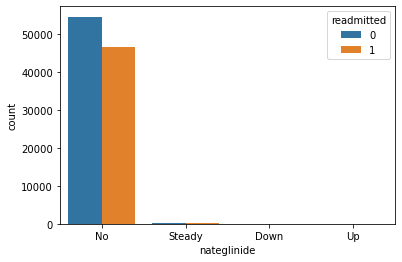

NATEGLINIDE
No        0.993092
Steady    0.006564
Up        0.000236
Down      0.000108
Name: nateglinide, dtype: float64


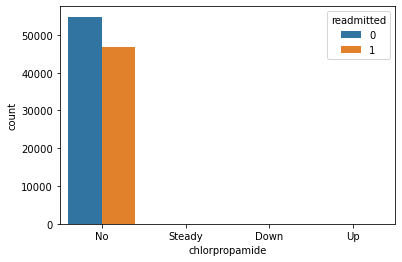

CHLORPROPAMIDE
No        0.999155
Steady    0.000776
Up        0.000059
Down      0.000010
Name: chlorpropamide, dtype: float64


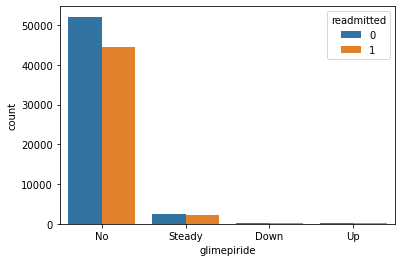

GLIMEPIRIDE
No        0.948989
Steady    0.045891
Up        0.003213
Down      0.001906
Name: glimepiride, dtype: float64


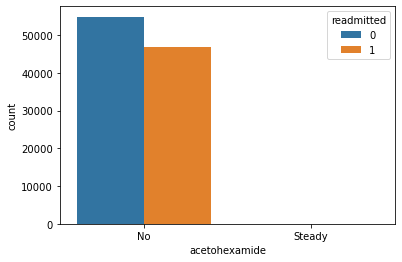

ACETOHEXAMIDE
No        0.99999
Steady    0.00001
Name: acetohexamide, dtype: float64


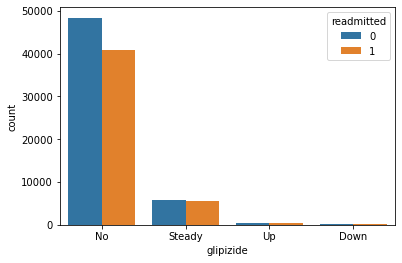

GLIPIZIDE
No        0.875348
Steady    0.111583
Up        0.007567
Down      0.005503
Name: glipizide, dtype: float64


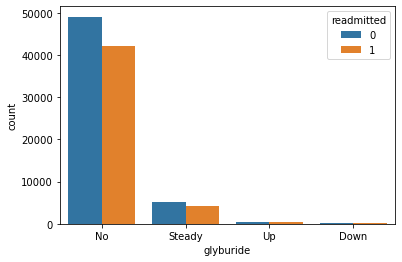

GLYBURIDE
No        0.895345
Steady    0.091133
Up        0.007979
Down      0.005542
Name: glyburide, dtype: float64


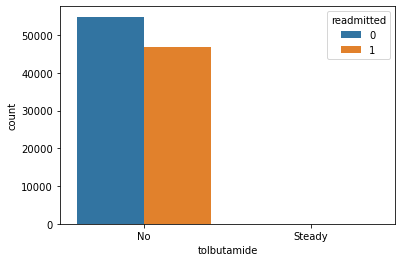

TOLBUTAMIDE
No        0.999774
Steady    0.000226
Name: tolbutamide, dtype: float64


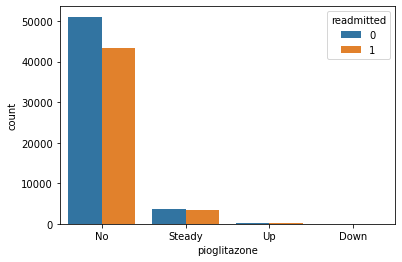

PIOGLITAZONE
No        0.927999
Steady    0.068542
Up        0.002299
Down      0.001160
Name: pioglitazone, dtype: float64


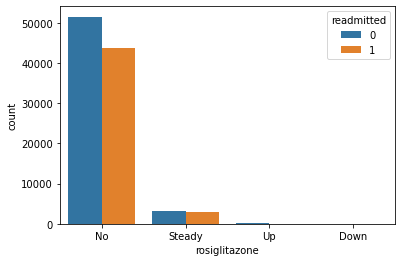

ROSIGLITAZONE
No        0.937463
Steady    0.059933
Up        0.001749
Down      0.000855
Name: rosiglitazone, dtype: float64


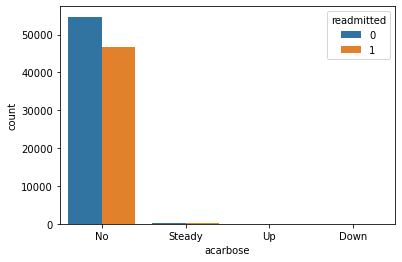

ACARBOSE
No        0.996973
Steady    0.002899
Up        0.000098
Down      0.000029
Name: acarbose, dtype: float64


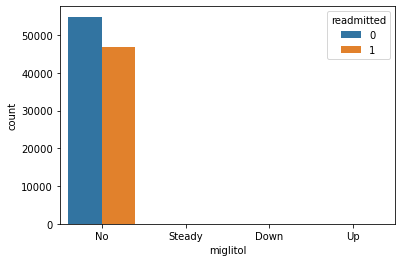

MIGLITOL
No        0.999627
Steady    0.000305
Down      0.000049
Up        0.000020
Name: miglitol, dtype: float64


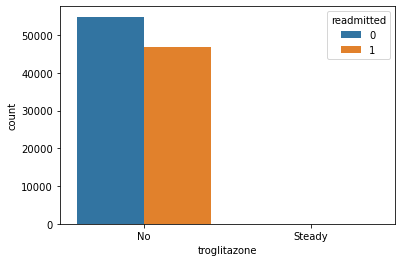

TROGLITAZONE
No        0.999971
Steady    0.000029
Name: troglitazone, dtype: float64


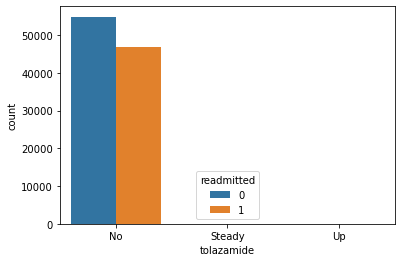

TOLAZAMIDE
No        0.999617
Steady    0.000373
Up        0.000010
Name: tolazamide, dtype: float64


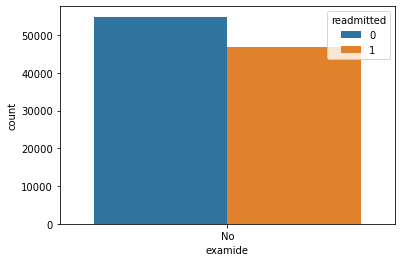

EXAMIDE
No    1.0
Name: examide, dtype: float64


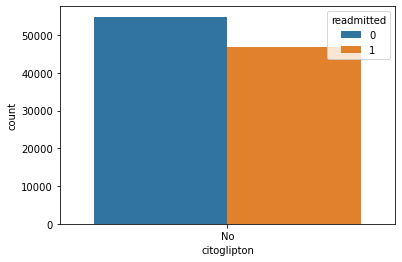

CITOGLIPTON
No    1.0
Name: citoglipton, dtype: float64


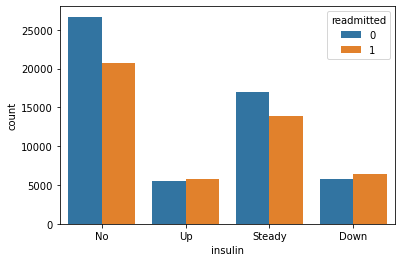

INSULIN
No        0.465592
Steady    0.303146
Down      0.120063
Up        0.111200
Name: insulin, dtype: float64


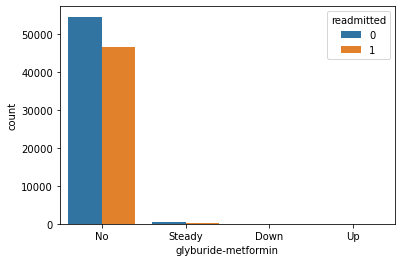

GLYBURIDE-METFORMIN
No        0.993062
Steady    0.006800
Up        0.000079
Down      0.000059
Name: glyburide-metformin, dtype: float64


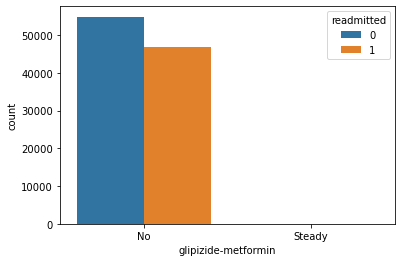

GLIPIZIDE-METFORMIN
No        0.999872
Steady    0.000128
Name: glipizide-metformin, dtype: float64


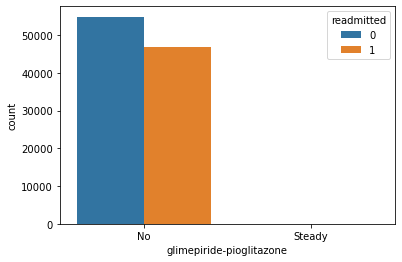

GLIMEPIRIDE-PIOGLITAZONE
No        0.99999
Steady    0.00001
Name: glimepiride-pioglitazone, dtype: float64


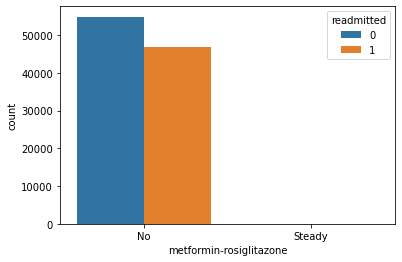

METFORMIN-ROSIGLITAZONE
No        0.99998
Steady    0.00002
Name: metformin-rosiglitazone, dtype: float64


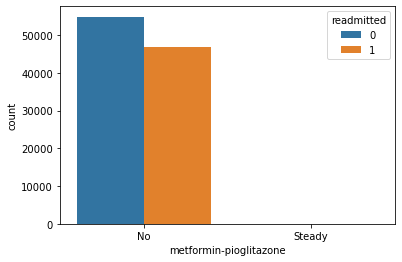

METFORMIN-PIOGLITAZONE
No        0.99999
Steady    0.00001
Name: metformin-pioglitazone, dtype: float64


In [162]:
def explo_medic(medicamentos):
  for medicamento in medicamentos:
    sns.countplot(x = medicamento, 
                  hue = "readmitted",
                  data = diabetes)
    plt.show()
    print(medicamento.upper())
    print(diabetes[f"{medicamento}"].value_counts(normalize = True))
    

explo_medic(columnas_medic)

En la mayoria de los medicamentos parece ser solo una de las clases la que tiene mayor presencia, hay categorias con muy pocos datos, por lo cual se puede pensar que estas variables no van a proporcionar información relevante para el modelamiento por lo cual es conveniente descartarlas.

Nuestro análisis continuará con la variable change, la cual hace referencia a si hay algún cambio en la medicación.

In [163]:
diabetes.change.unique()

array(['No', 'Ch'], dtype=object)

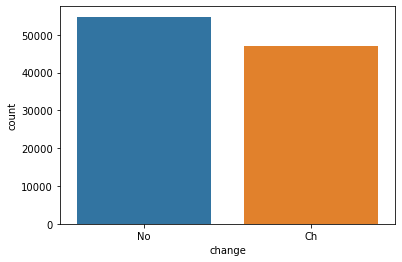

Proporción por valor de la variable change
No    0.538054
Ch    0.461946
Name: change, dtype: float64


In [164]:
#Ahora veamos la distribución de la variable
sns.countplot(x="change", data = diabetes, 
              order = diabetes.change.value_counts().index)
plt.show()

print("Proporción por valor de la variable change")
print(diabetes.change.value_counts(normalize = True))

En términos generales, a aproximadamente el 54% de la muestra no se le ha cambiado la medicación. Veamos cómo se distribuye la readmisión y la probabilidad de readmisión en función de esta variable.

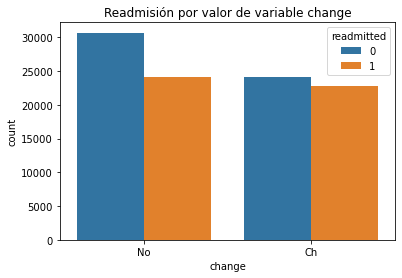

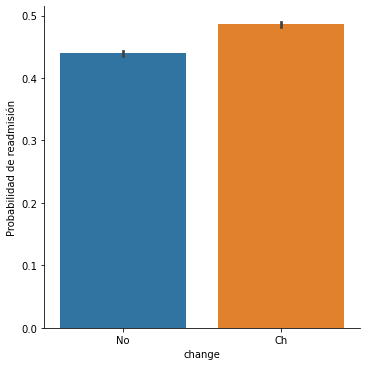

In [165]:
sns.countplot(x = "change", hue = "readmitted", data = diabetes,
             order = diabetes.change.value_counts().index)
plt.title("Readmisión por valor de variable change")
plt.show()

prob_chg = sns.catplot(x = "change",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5,order = diabetes.change.value_counts().index)
prob_chg.set_ylabels("Probabilidad de readmisión")
plt.show()

Lo que sugiere la muestra es que a quienes se les ha cambiado la medicación tienen mayor probabilidad de ser readmitidos que a quienes no. Para ambas categorias la probabilidad de readmisión está por encima de 0.4.

El análisis exploratorio finaliza con la variable diabetesMed, la cual indica si hubo o no una prescripción de medicamento para la diabetes o no.

In [166]:
diabetes.diabetesMed.unique()

array(['No', 'Yes'], dtype=object)

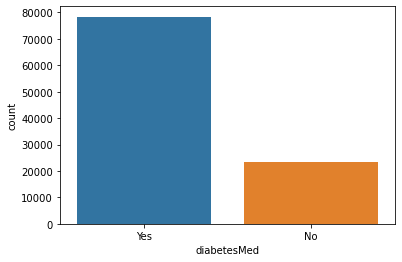

Proporción por valor de la variable diabetesMed
Yes    0.770034
No     0.229966
Name: diabetesMed, dtype: float64


In [167]:
#Ahora veamos la distribución de la variable
sns.countplot(x="diabetesMed", data = diabetes, 
              order = diabetes.diabetesMed.value_counts().index)
plt.show()

print("Proporción por valor de la variable diabetesMed")
print(diabetes.diabetesMed.value_counts(normalize = True))

Para el 77% de la muestra hubo una prescripción de medicamento para la diabetes. Veamos ahora la distribución de la readmisión en función de está variable así como de la probabilidad asociada.

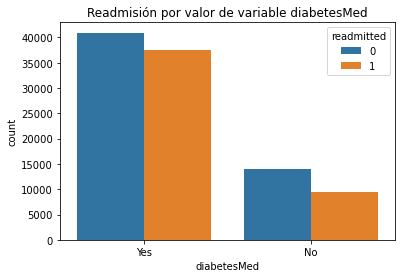

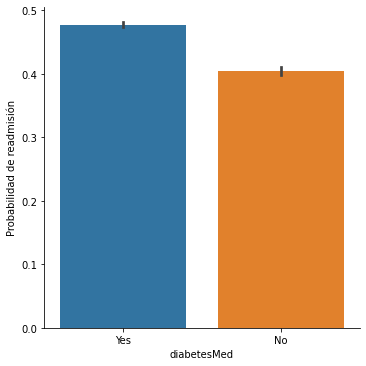

In [168]:
sns.countplot(x = "diabetesMed", hue = "readmitted", data = diabetes,
             order = diabetes.diabetesMed.value_counts().index)
plt.title("Readmisión por valor de variable diabetesMed")
plt.show()

prob_diabmed = sns.catplot(x = "diabetesMed",y = "readmitted", 
                data = diabetes, kind = "bar", height= 5,order = diabetes.diabetesMed.value_counts().index)
prob_diabmed.set_ylabels("Probabilidad de readmisión")
plt.show()

Como se observa, quienes han tenido una prescipción de medicamento para la diabetes tienen mayor probabilidad de readmisión que quienes no. De esta forma contamos con un mayor entendimiento del dataset y tenemos idea más clara de las variables que pueden proporcionar información relevante para el modelamiento predictivo.

Ahora veremos algunas otras medidas de desempeño interesantes antes del modelamiento como la presencia de missing values en dataset. En principio se importan las librerías necesarias.

In [169]:
#Visualización
import missingno as msno
import plotly.express as px


# Medidas de desempeño
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

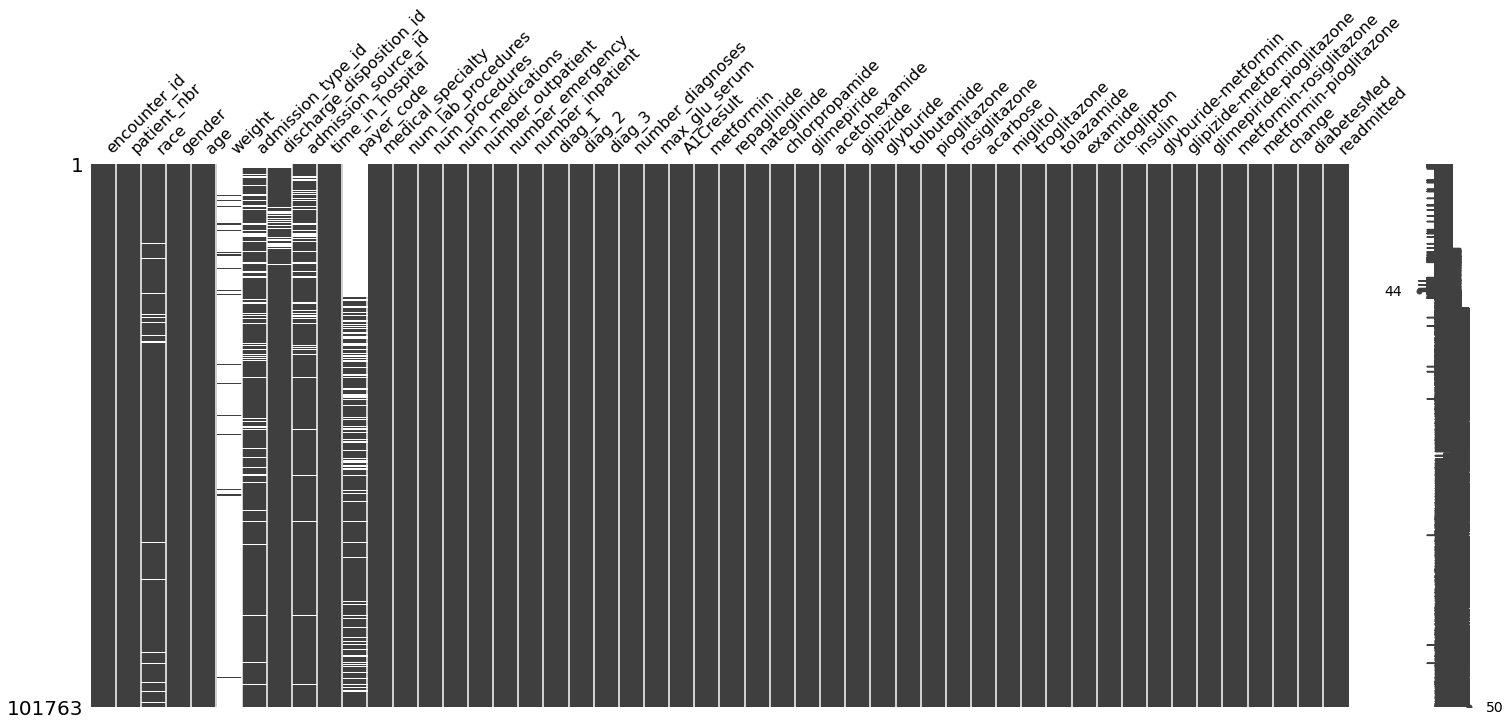

In [170]:
#Missing values
msno.matrix(diabetes)
plt.show()

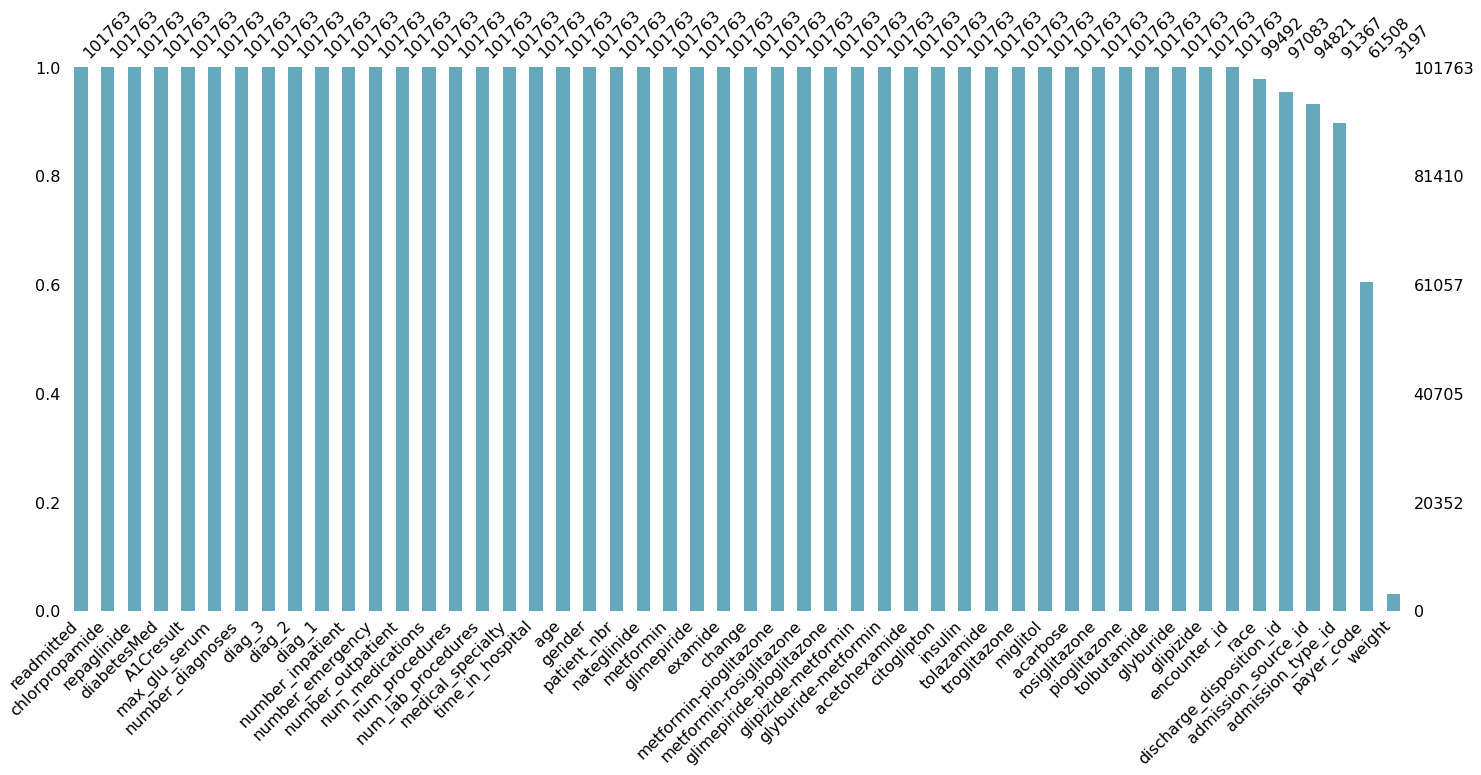

In [171]:
msno.bar(diabetes,sort='descending',color='#66a9bc')
plt.show()

Aquellas columnas que se identificaron a través del análisis exploratorio no proporcionan mayor información para el modleamiento, ya sea por la cantidad de missing values o porque cuenta con solo una categoria mayoritariamente se descartan. Pero antes de eliminar algunas de ellas se realizará la codificación de las variables relacionadas con los medicamentos.

In [173]:
for col in columnas_medic:
    diabetes[col] = diabetes[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    diabetes[col] = diabetes[col].astype(int)

In [174]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101763 non-null  int64  
 1   patient_nbr               101763 non-null  int64  
 2   race                      99492 non-null   object 
 3   gender                    101763 non-null  object 
 4   age                       101763 non-null  int64  
 5   weight                    3197 non-null    float64
 6   admission_type_id         91367 non-null   object 
 7   discharge_disposition_id  97083 non-null   object 
 8   admission_source_id       94821 non-null   object 
 9   time_in_hospital          101763 non-null  int64  
 10  payer_code                61508 non-null   object 
 11  medical_specialty         101763 non-null  object 
 12  num_lab_procedures        101763 non-null  int64  
 13  num_procedures            101763 non-null  i

In [175]:
col_elim=['encounter_id','patient_nbr','weight','payer_code','repaglinide','nateglinide','chlorpropamide',
         'glimepiride','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone',
         'tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
         'metformin-rosiglitazone','metformin-pioglitazone']

diabetes1=diabetes.copy()

In [176]:
diabetes1.drop(col_elim,axis=1, inplace=True)
diabetes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99492 non-null   object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  int64 
 3   admission_type_id         91367 non-null   object
 4   discharge_disposition_id  97083 non-null   object
 5   admission_source_id       94821 non-null   object
 6   time_in_hospital          101763 non-null  int64 
 7   medical_specialty         101763 non-null  object
 8   num_lab_procedures        101763 non-null  int64 
 9   num_procedures            101763 non-null  int64 
 10  num_medications           101763 non-null  int64 
 11  number_outpatient         101763 non-null  int64 
 12  number_emergency          101763 non-null  int64 
 13  number_inpatient          101763 non-null  int64 
 14  diag

In [177]:
columnas_numericas=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient',
                   'number_emergency','number_inpatient','number_diagnoses']

columnas_categoricas=['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id',
                     'medical_specialty','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin',
                     'glipizide','glyburide','pioglitazone','rosiglitazone','insulin','change','diabetesMed','readmitted']

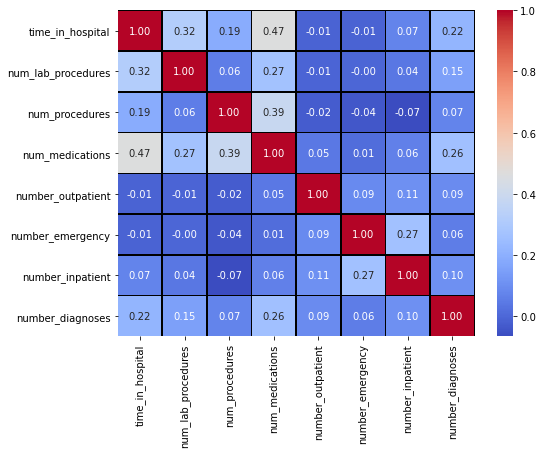

In [178]:
#Definir correlación entre las variables numericas
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(diabetes1[columnas_numericas].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

In [179]:
#Llenar missing values
diabetes1["race"].fillna(diabetes1["race"].mode()[0], inplace = True)
diabetes1["admission_type_id"].fillna(diabetes1["admission_type_id"].mode()[0], inplace = True)
diabetes1["discharge_disposition_id"].fillna(diabetes1["discharge_disposition_id"].mode()[0], inplace = True)
diabetes1["admission_source_id"].fillna(diabetes1["admission_source_id"].mode()[0], inplace = True)

In [183]:
#diabetes1.info()
#diabetes1.race.unique()
# Obtener las variables dummies para Race, Medical specialty y Id's 
one_hot_diabetes = pd.get_dummies(diabetes1, columns=['race','medical_specialty'], prefix=["enc","enc"])

columnas_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_diabetes[columnas_ids] = one_hot_diabetes[columnas_ids].astype('str')
one_hot_diabetes = pd.get_dummies(one_hot_diabetes, columns=columnas_ids)

Dividir la muestra en el set de entrenamiento y el set de prueba (Training, test)

In [184]:
df = one_hot_diabetes.copy()
X = df.drop(columns="readmitted", axis=1)
Y = df.readmitted

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 15)

In [200]:
#Encoding (Codificación)
ordinal_enc = OrdinalEncoder()
X_train.age = ordinal_enc.fit_transform(X_train.age.values.reshape(-1, 1))
X_test.age = ordinal_enc.transform(X_test.age.values.reshape(-1, 1))

C:\Users\USer\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USer\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
columnas_diagnostico = ["diag_1","diag_2","diag_3"]
for columna in columnas_diagnostico:
    label_enc = LabelEncoder()
    X_train[columna] = label_enc.fit_transform(X_train[columna])
    X_test[columna] = label_enc.fit_transform(X_test[columna])

C:\Users\USer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [202]:
binaria = ['change', 'diabetesMed', 'gender']

for columna in binaria:
    label_enc = LabelEncoder()
    X_train[columna] = label_enc.fit_transform(X_train[columna])
    X_test[columna] = label_enc.fit_transform(X_test[columna])

C:\Users\USer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
# Para evitar inconvenientes con la falta de balance de la muestra respecto a la readmisión se utiliza remuestreo
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 15)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

1    37529
0    37529
Name: readmitted, dtype: int64

In [210]:
#Ahora que hemos solucionado el problema del balance en la muestra se separa nuevamente en Training inicialmente, después en
#training y test
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

In [211]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 15)

Ahora que tenemos la muestra de training y test procedemos al modelamiento y medidas de desempeño de los modelos.

In [212]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

In [213]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

In [214]:
#Se define el threshold
thresh = 0.5

Una vez se han codificado las variables y se tiene la muestra de training y test balanceada, se procede a evaluar diferentes modelos de clasificación como el modelo de regresión logística, los modelos de ensamble de arboles de decisión como random forest, los modelos de boosting, entre otros.

Modelo de Regresión Logística

In [215]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 15).fit(X_train, y_train)

In [216]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_val)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_val,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.667
accuracy:0.617
recall:0.548
precision:0.637
fscore:0.589
specificity:0.687
 
Validation:
AUC:0.656
accuracy:0.610
recall:0.547
precision:0.624
fscore:0.583
specificity:0.673
 


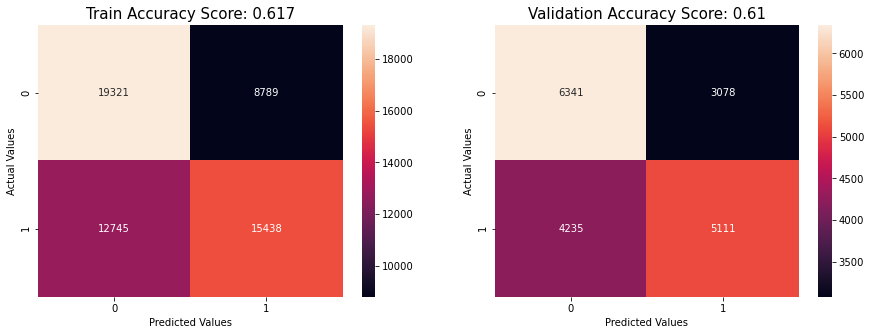

In [217]:
# Matriz de confusión

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = log_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

A partir de estas medidas de desempeño vemos que la precisión del modelo se encuentra por encima del 60% tanto en la muestra de training como de validación. Vale la pena comparar con otros métodos de clasificación como Random Forest, métodos basados en el ensamble de diferentes predictores a partir del concepto de árboles de decisión.

Random Forest

In [218]:
random_forest_model = RandomForestClassifier(random_state=15, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=15)

In [219]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_val,y_val_preds, thresh)

Random Forest
Training:
AUC:0.662
accuracy:0.615
recall:0.517
precision:0.643
fscore:0.573
specificity:0.713
 
Validation:
AUC:0.656
accuracy:0.612
recall:0.514
precision:0.636
fscore:0.569
specificity:0.708
 


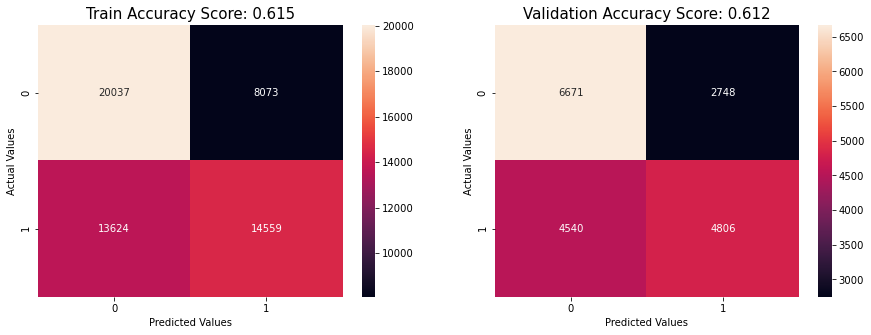

In [220]:
# Matriz de confusión

predictions = random_forest_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = random_forest_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

La precisión del modelo de Random Forest también se encuentra por encima del 60% tanto para la muestra de entrenamiento como para la muestra de validación. Sin embargo, la especificidad del modelo de RF es mayor en el set de validación a la obtenida con el modelo Logit. En general, a pesar de usar un método ensamblado su desempeño no difiere significativamente del logrado con el modelo Logit.

Vale la pena validar la predicción usando otro método basado en el ensamble de múltiples árboles como Boosting, especificamente un clasificador Gradient Boosting

In [221]:
gradient_model = GradientBoostingClassifier(random_state=15)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=15)

In [222]:
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_val,y_val_preds, thresh)

Gradient Boosing
Training:
AUC:0.686
accuracy:0.631
recall:0.576
precision:0.647
fscore:0.610
specificity:0.685
 
Validation:
AUC:0.671
accuracy:0.620
recall:0.568
precision:0.632
fscore:0.598
specificity:0.672
 


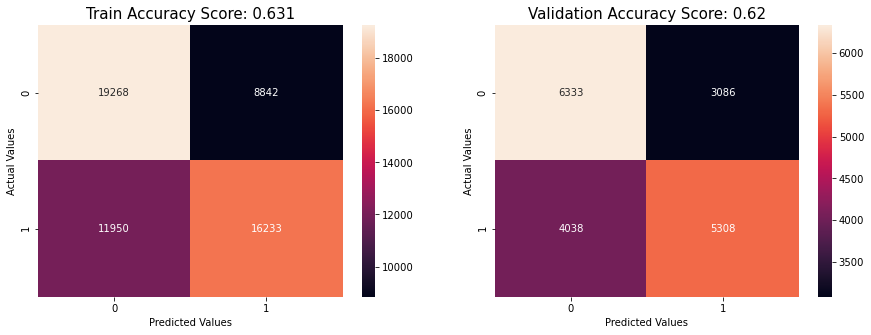

In [223]:
# Matriz de confusión

predictions = gradient_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = gradient_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

El desempeño del modelo Gradient Boosting tiene una mejor precisión que el modelo de Random Forest y Logit, así como también si analizamos el AUC, el modelo de Boosting tiene un desempeño mejor en la muestra de validación. En especificidad, fue el modelo de Random Forest el que tuvo mayor rendimiento.